# Problem Statement

Buying our own house is a dream for almost all of us. But the price of house is also a important consideration while buying any  house which depends on number of attributes like no of beds, size of living area, garage, etc. House Price prediction dataset is all about predicting the SalePrice of a house by analyzing no of features about the house. So, the main task for this problem is to predict the SalePrice of house by considering 79 attributes about the house.

# Loading Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows=85

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
Data=pd.read_csv('D:/Study material/Datasets/Hosue_price_dataset/train.csv')

# Overview of Dataset

In [4]:
Data.shape

(1460, 81)

In [5]:
Data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
Data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

# Pearson Correlation

In [8]:
Data.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

<Figure size 1224x648 with 0 Axes>

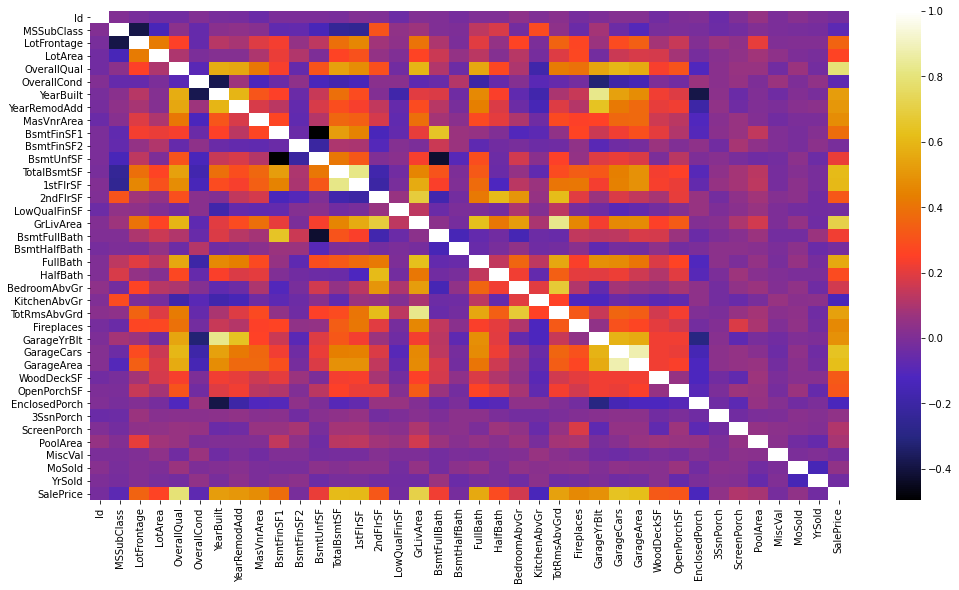

In [9]:
plt.figure(figsize=(17,9))
sns.heatmap(Data.corr(),cmap=plt.cm.CMRmap)

# Splitting the Data into train and test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train,test=train_test_split(Data,test_size=0.2,random_state=42,shuffle=True)

train.shape
test.shape

(1168, 81)

(292, 81)

In [12]:
X_train=train.drop(['SalePrice'],axis=1)
Y_train=train['SalePrice']
X_test=test.drop(['SalePrice'],axis=1)
Y_test=test['SalePrice']

X_train.shape
len(Y_train)
X_test.shape
len(Y_test)

(1168, 80)

1168

(292, 80)

292

# Imputing Missing Values

In [13]:
msng=(Data.isnull().sum()).sort_values(ascending=False)
msng_percnt=(msng/len(Data))*100
pd.concat(objs=[msng,msng_percnt],axis=1,keys=['Missing Count','Missing Percentage'])

Missing Count  Missing Percentage
PoolQC                  1453           99.520548
MiscFeature             1406           96.301370
Alley                   1369           93.767123
Fence                   1179           80.753425
FireplaceQu              690           47.260274
LotFrontage              259           17.739726
GarageCond                81            5.547945
GarageType                81            5.547945
GarageYrBlt               81            5.547945
GarageFinish              81            5.547945
GarageQual                81            5.547945
BsmtExposure              38            2.602740
BsmtFinType2              38            2.602740
BsmtFinType1              37            2.534247
BsmtCond                  37            2.534247
BsmtQual                  37            2.534247
MasVnrArea                 8            0.547945
MasVnrType                 8            0.547945
Electrical                 1            0.068493
Utilities                  0            0.000000
YearRemodAdd               0            0.000000
MSSubClass                 0            0.000000
Foundation                 0            0.000000
ExterCond                  0            0.000000
ExterQual                  0            0.000000
Exterior2nd                0            0.000000
Exterior1st                0            0.000000
RoofMatl                   0            0.000000
RoofStyle                  0            0.000000
YearBuilt                  0            0.000000
LotConfig                  0            0.000000
OverallCond                0            0.000000
OverallQual                0            0.000000
HouseStyle                 0            0.000000
BldgType                   0            0.000000
Condition2                 0            0.000000
BsmtFinSF1                 0            0.000000
MSZoning                   0            0.000000
LotArea                    0            0.000000
Street                     0            0.000000
Condition1                 0            0.000000
Neighborhood               0            0.000000
LotShape                   0            0.000000
LandContour                0            0.000000
LandSlope                  0            0.000000
SalePrice                  0            0.000000
HeatingQC                  0            0.000000
BsmtFinSF2                 0            0.000000
EnclosedPorch              0            0.000000
Fireplaces                 0            0.000000
GarageCars                 0            0.000000
GarageArea                 0            0.000000
PavedDrive                 0            0.000000
WoodDeckSF                 0            0.000000
OpenPorchSF                0            0.000000
3SsnPorch                  0            0.000000
BsmtUnfSF                  0            0.000000
ScreenPorch                0            0.000000
PoolArea                   0            0.000000
MiscVal                    0            0.000000
MoSold                     0            0.000000
YrSold                     0            0.000000
SaleType                   0            0.000000
Functional                 0            0.000000
TotRmsAbvGrd               0            0.000000
KitchenQual                0            0.000000
KitchenAbvGr               0            0.000000
BedroomAbvGr               0            0.000000
HalfBath                   0            0.000000
FullBath                   0            0.000000
BsmtHalfBath               0            0.000000
BsmtFullBath               0            0.000000
GrLivArea                  0            0.000000
LowQualFinSF               0            0.000000
2ndFlrSF                   0            0.000000
1stFlrSF                   0            0.000000
CentralAir                 0            0.000000
SaleCondition              0            0.000000
Heating                    0            0.000000
TotalBsmtSF                0            0.000000
Id                         0            0.0000

In [14]:
# More than 50% of data is missing for PoolQC, MiscFeature, Alley and Fence. These features should be removed.
# Also column 'Id' is of no use, so also droping the feature 'Id' from X_train and X_test

X_train.drop(['PoolQC','MiscFeature','Alley','Fence','Id'],axis=1,inplace=True)
X_test.drop(['PoolQC','MiscFeature','Alley','Fence','Id'],axis=1,inplace=True)

In [15]:
# Missing values in FireplaceQu, GarageCond, GarageType, GarageQual, GarageFinish, BsmtQual, BsmtFinType2, BsmtCond,
# BsmtExposure and BsmtFinType1  means fireplace, garage and Basement is missing in the houses as in data description.

X_train['FireplaceQu'].fillna('No Firplce',inplace=True)
X_train['GarageCond'].fillna('No Garage',inplace=True)
X_train['GarageType'].fillna('No Garage',inplace=True)
X_train['GarageQual'].fillna('No Garage',inplace=True)
X_train['GarageFinish'].fillna('No Garage',inplace=True)
X_train['BsmtQual'].fillna('No Bsmnt',inplace=True)
X_train['BsmtFinType2'].fillna('No Bsmnt',inplace=True)
X_train['BsmtCond'].fillna('No Bsmnt',inplace=True)
X_train['BsmtExposure'].fillna('No Bsmnt',inplace=True)
X_train['BsmtFinType1'].fillna('No Bsmnt',inplace=True)




# Imputing Continuous Features

In [16]:
# MasVnrArea and LotFrontage should be imuted with their respective median value.

med_msng = X_train[['MasVnrArea','LotFrontage']]

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
median_imputer=SimpleImputer(strategy='median')
median_imputer.fit(med_msng)

SimpleImputer(strategy='median')

In [19]:
# Imputing Missing Values and transforming tha result to Daaframe

Median_Imputed=median_imputer.transform(med_msng)
Median_Imputed=pd.DataFrame(Median_Imputed,columns=['MasVnrArea','LotFrontage'],index=med_msng.index)

# Imputing Categorical Features

In [20]:
# GarageYrBlt, Electrical and MasVnrType should be imputed with the respective most frequent value

freq_msg = X_train[['GarageYrBlt','Electrical','MasVnrType']]

In [21]:
catgr_imputer = SimpleImputer(strategy=('most_frequent'))
catgr_imputer.fit(freq_msg)

SimpleImputer(strategy='most_frequent')

In [22]:
Catgr_Imputed=catgr_imputer.transform(freq_msg)
Catgr_Imputed=pd.DataFrame(Catgr_Imputed,columns=['GarageYrBlt','Electrical','MasVnrType'],index=freq_msg.index)

In [23]:
# Now all the missing values are imputed.
# Replacing the imputed values in X_train

X_train[['MasVnrArea','LotFrontage']] = Median_Imputed
X_train[['GarageYrBlt','Electrical','MasVnrType']] = Catgr_Imputed

# Exploratory Data Analysis

<Figure size 1440x576 with 0 Axes>

((array([-3.24209521, -2.98025416, -2.83435097, ...,  2.83435097,
          2.98025416,  3.24209521]),
  array([ 34900,  37900,  39300, ..., 582933, 625000, 745000], dtype=int64)),
 (72613.26143108228, 181441.54195205483, 0.9379349184086102))

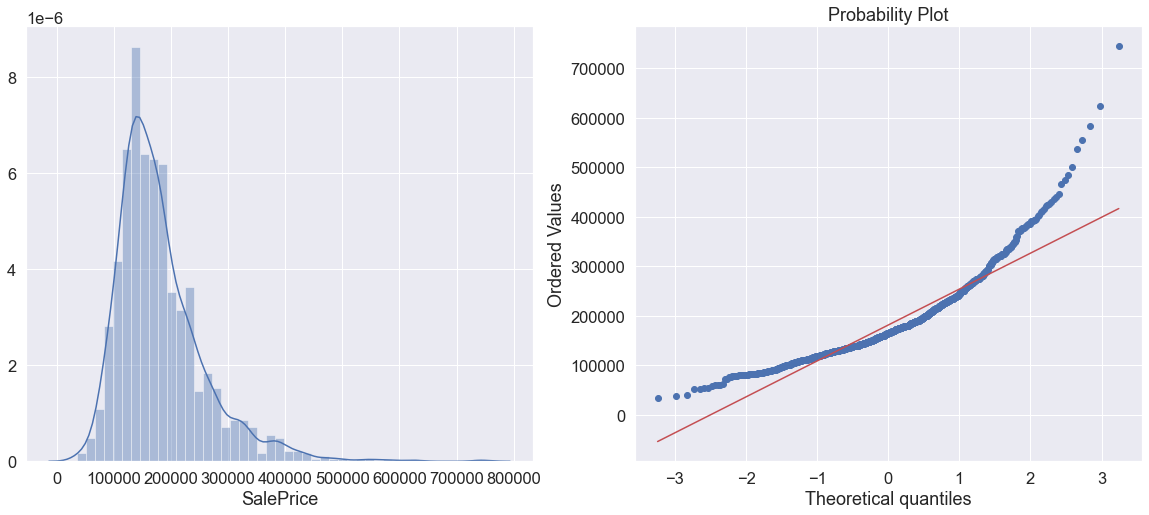

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(Y_train)
plt.subplot(1, 2, 2)
stats.probplot(Y_train,plot=plt)
sns.set(font_scale=1.5)

# SalePrice is left skewed.

In [26]:
# Using log of SalePrice to make the distribution normal

Y_train_log = np.log(Y_train)

<Figure size 1440x576 with 0 Axes>

((array([-3.24209521, -2.98025416, -2.83435097, ...,  2.83435097,
          2.98025416,  3.24209521]),
  array([10.46024211, 10.54270639, 10.5789798 , ..., 13.27582754,
         13.34550693, 13.5211395 ])),
 (0.38979519774789584, 12.030651883324609, 0.9959244166228076))

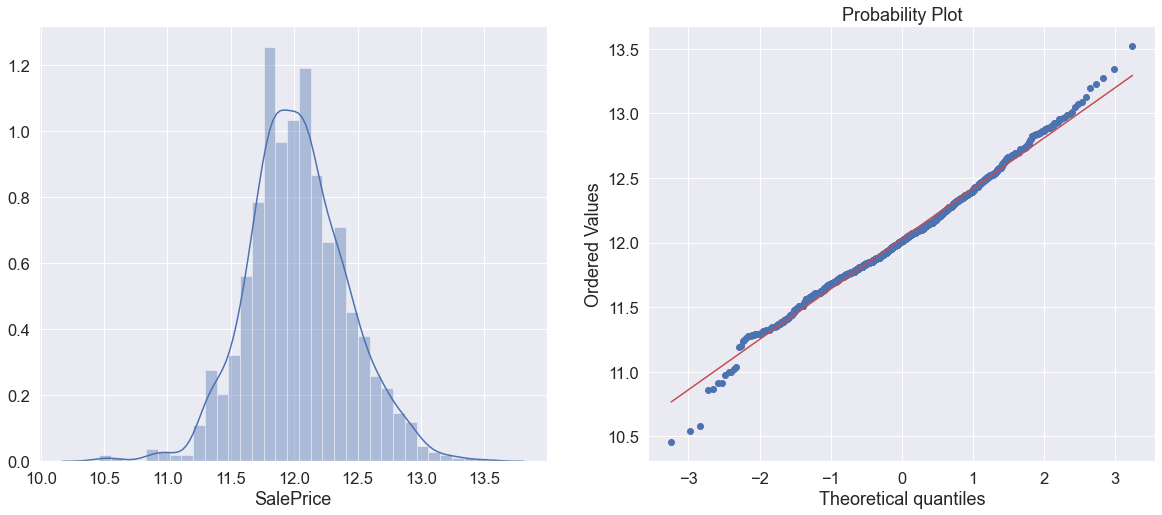

In [27]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(Y_train_log)
plt.subplot(1, 2, 2)
stats.probplot(Y_train_log,plot=plt)

# log of SalePrice is more normally distributed than SalePrice

In [28]:
# Categorical features

catgorical_features=X_train[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope','Condition1',
                    'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','MasVnrType','ExterQual','ExterCond',
                    'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
                    'CentralAir', 'Electrical', 'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
                    'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType','SaleCondition']].columns

Text(0.5, 1.0, 'Boxplot of MSZoning x SalePrice')

Text(0.5, 1.0, 'Boxplot of Street x SalePrice')

Text(0.5, 1.0, 'Boxplot of LotShape x SalePrice')

Text(0.5, 1.0, 'Boxplot of LandContour x SalePrice')

Text(0.5, 1.0, 'Boxplot of Utilities x SalePrice')

Text(0.5, 1.0, 'Boxplot of LotConfig x SalePrice')

Text(0.5, 1.0, 'Boxplot of LandSlope x SalePrice')

Text(0.5, 1.0, 'Boxplot of Condition1 x SalePrice')

Text(0.5, 1.0, 'Boxplot of Condition2 x SalePrice')

Text(0.5, 1.0, 'Boxplot of BldgType x SalePrice')

Text(0.5, 1.0, 'Boxplot of HouseStyle x SalePrice')

Text(0.5, 1.0, 'Boxplot of RoofStyle x SalePrice')

Text(0.5, 1.0, 'Boxplot of RoofMatl x SalePrice')

Text(0.5, 1.0, 'Boxplot of MasVnrType x SalePrice')

Text(0.5, 1.0, 'Boxplot of ExterQual x SalePrice')

Text(0.5, 1.0, 'Boxplot of ExterCond x SalePrice')

Text(0.5, 1.0, 'Boxplot of Foundation x SalePrice')

Text(0.5, 1.0, 'Boxplot of BsmtQual x SalePrice')

Text(0.5, 1.0, 'Boxplot of BsmtCond x SalePrice')

Text(0.5, 1.0, 'Boxplot of BsmtExposure x SalePrice')

Text(0.5, 1.0, 'Boxplot of BsmtFinType1 x SalePrice')

Text(0.5, 1.0, 'Boxplot of BsmtFinType2 x SalePrice')

Text(0.5, 1.0, 'Boxplot of Heating x SalePrice')

Text(0.5, 1.0, 'Boxplot of HeatingQC x SalePrice')

Text(0.5, 1.0, 'Boxplot of CentralAir x SalePrice')

Text(0.5, 1.0, 'Boxplot of Electrical x SalePrice')

Text(0.5, 1.0, 'Boxplot of KitchenQual x SalePrice')

Text(0.5, 1.0, 'Boxplot of Functional x SalePrice')

Text(0.5, 1.0, 'Boxplot of FireplaceQu x SalePrice')

Text(0.5, 1.0, 'Boxplot of GarageType x SalePrice')

Text(0.5, 1.0, 'Boxplot of GarageFinish x SalePrice')

Text(0.5, 1.0, 'Boxplot of GarageQual x SalePrice')

Text(0.5, 1.0, 'Boxplot of GarageCond x SalePrice')

Text(0.5, 1.0, 'Boxplot of PavedDrive x SalePrice')

Text(0.5, 1.0, 'Boxplot of SaleType x SalePrice')

Text(0.5, 1.0, 'Boxplot of SaleCondition x SalePrice')

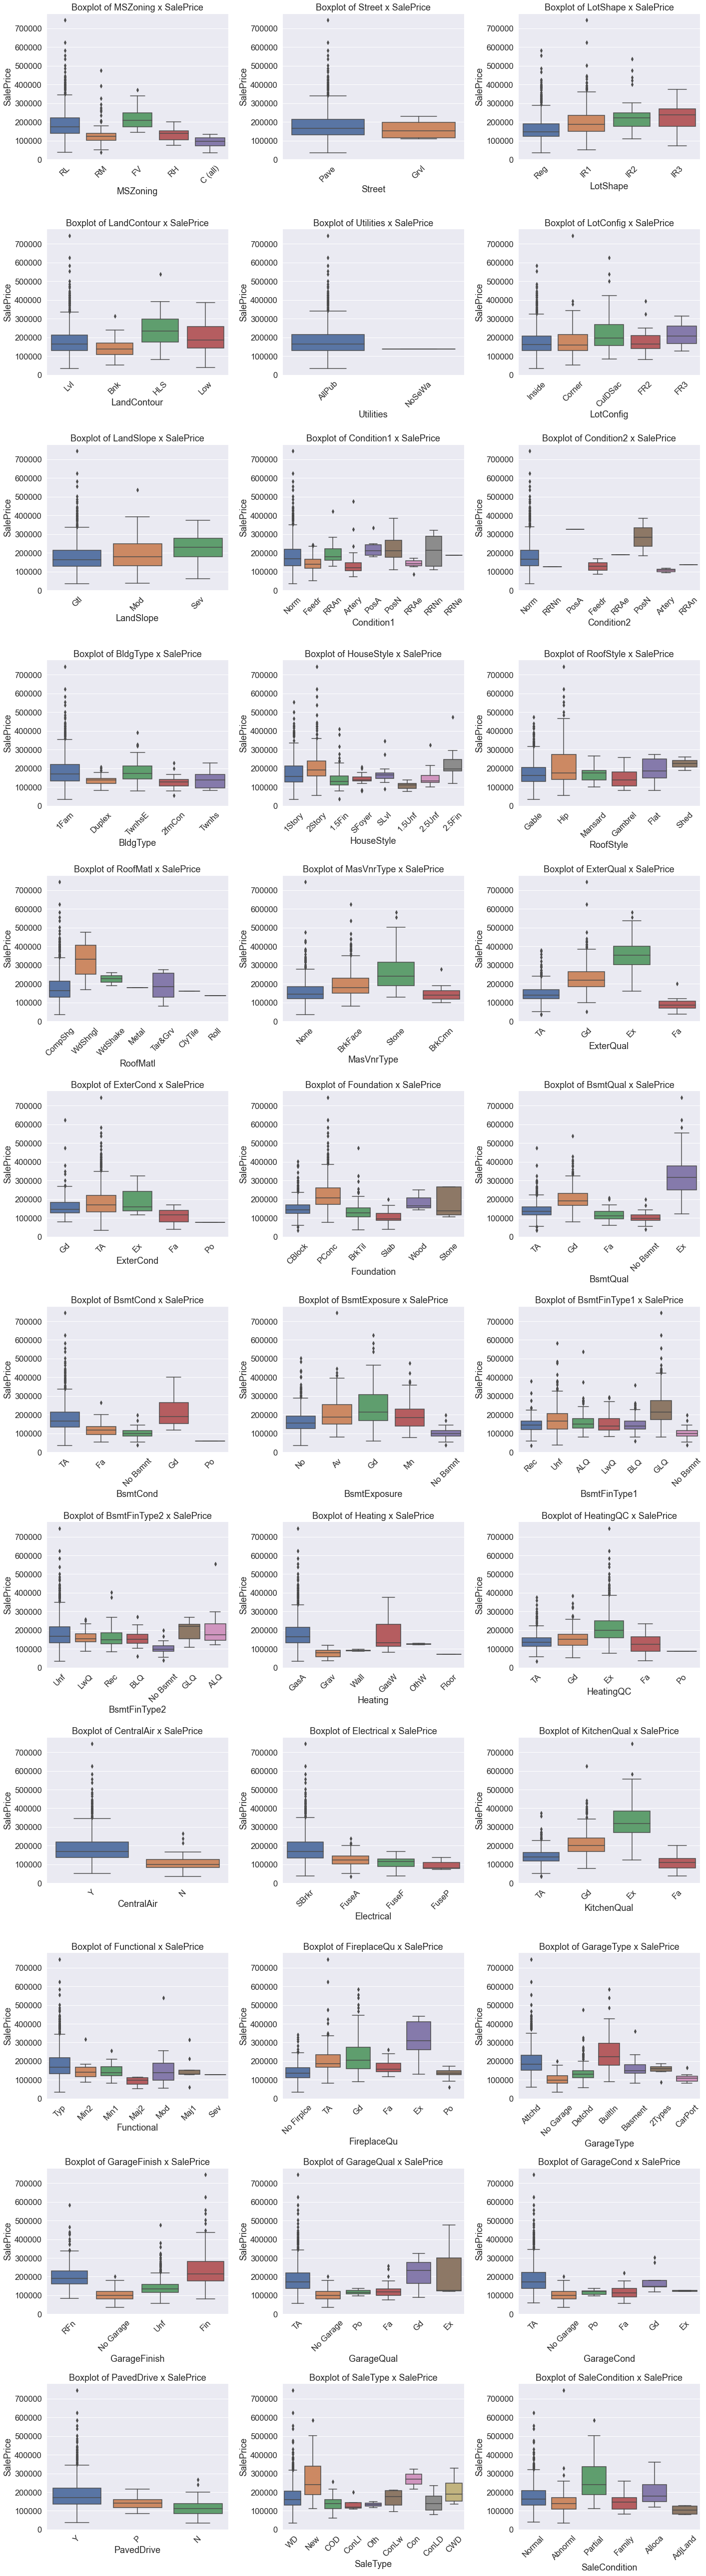

In [29]:
# Plotting Boxplot for Categorical Features

fig, ax = plt.subplots(len(catgorical_features)//3, 3, figsize=(20, len(catgorical_features)*2))
for idx, feature in enumerate(catgorical_features):
    sns.boxplot(x=feature, y=Y_train, data=X_train, ax=ax[idx//3, idx%3])
    ax[idx//3, idx%3].set_title(f'Boxplot of {feature} x SalePrice')
    ax[idx//3, idx%3].xaxis.set_tick_params(rotation=45)
    
plt.tight_layout()

<Figure size 1224x648 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

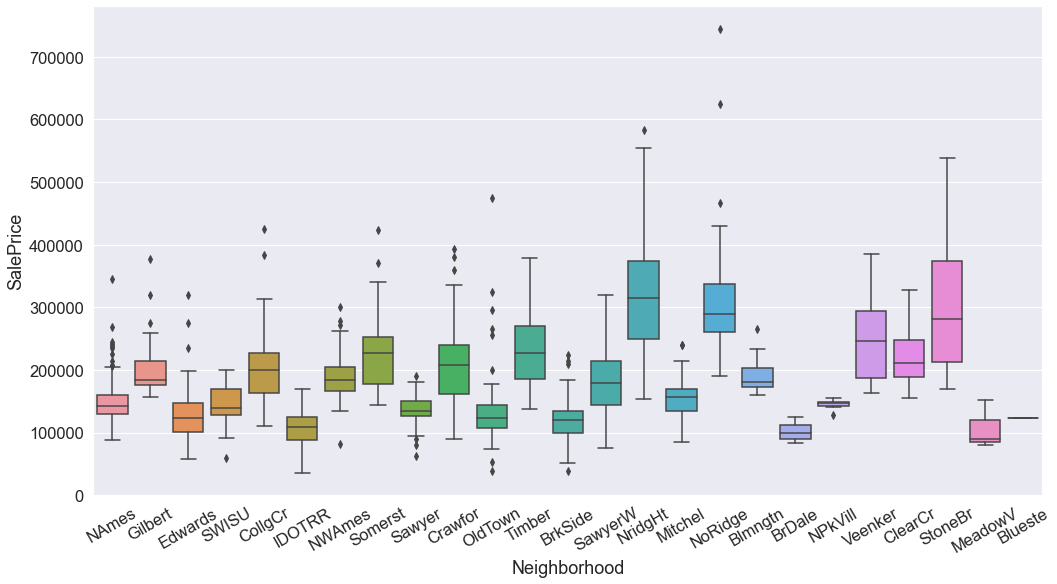

In [30]:
plt.figure(figsize=(17,9))
sns.boxplot(x=X_train['Neighborhood'],y=Y_train)
plt.xticks(rotation=30)

<Figure size 1224x648 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

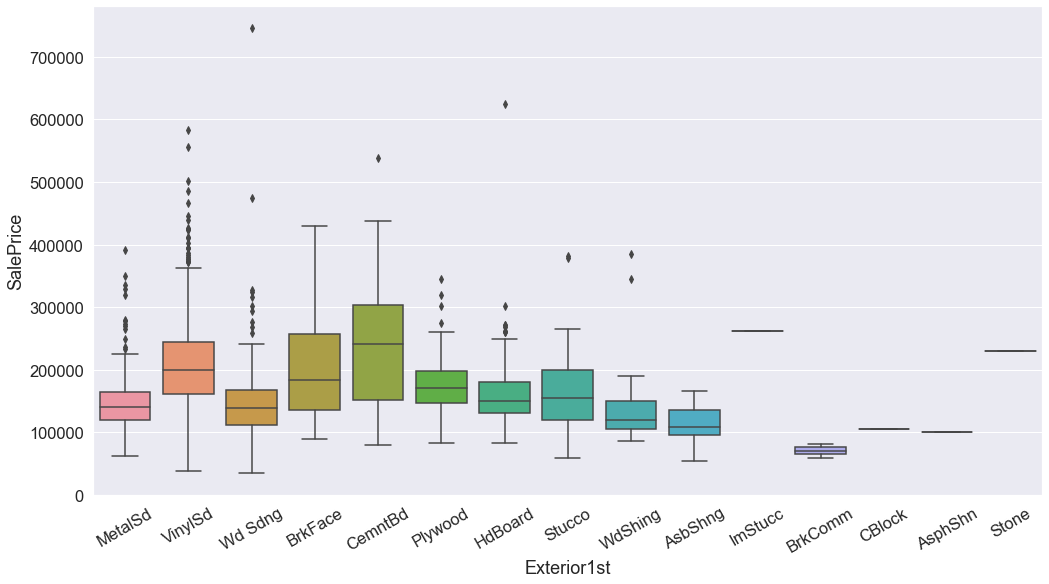

In [31]:
plt.figure(figsize=(17,9))
sns.boxplot(x=X_train['Exterior1st'],y=Y_train)
plt.xticks(rotation=30)

<Figure size 1224x648 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

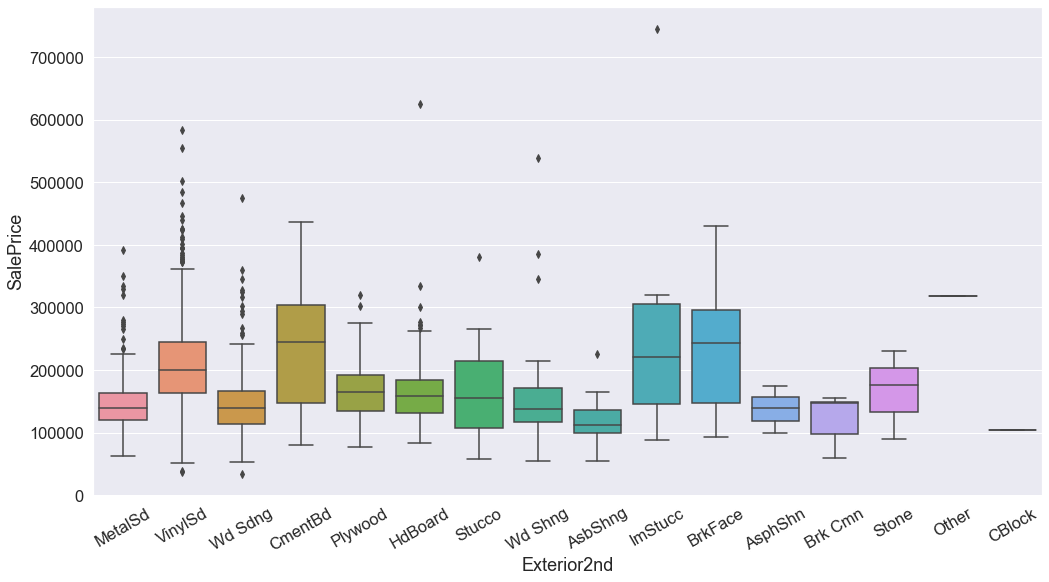

In [32]:
plt.figure(figsize=(17,9))
sns.boxplot(x=X_train['Exterior2nd'],y=Y_train)
plt.xticks(rotation=30)

<Figure size 1224x648 with 0 Axes>

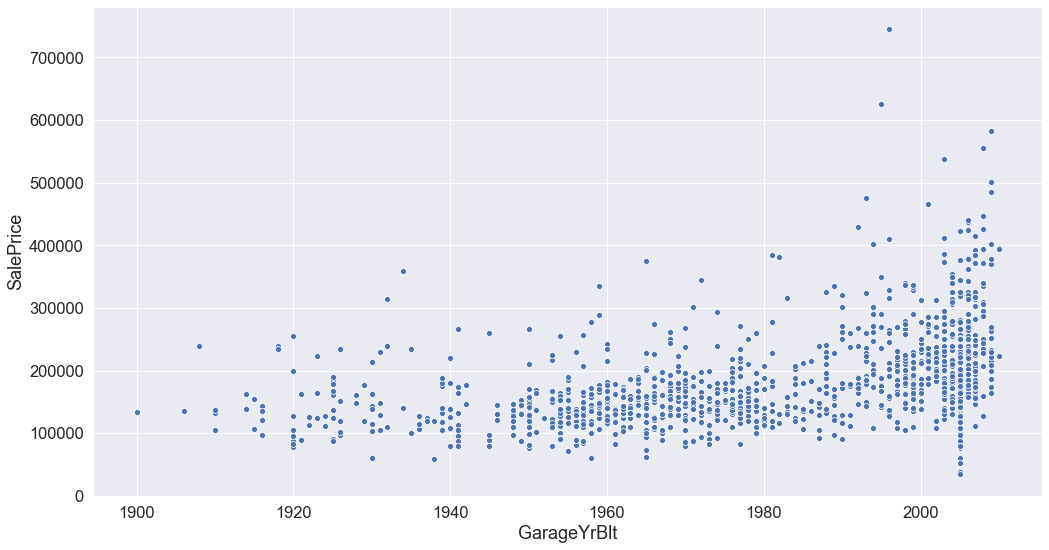

In [33]:
plt.figure(figsize=(17,9))
sns.scatterplot(x=X_train['GarageYrBlt'],y=Y_train)

In [34]:
# All features which aren't Categorical

Non_categorical_features = X_train.select_dtypes(exclude='object').columns

Text(0.5, 1.0, 'Scatterplot of MSSubClass X SalePrice')

Text(0.5, 1.0, 'Scatterplot of LotFrontage X SalePrice')

Text(0.5, 1.0, 'Scatterplot of LotArea X SalePrice')

Text(0.5, 1.0, 'Scatterplot of OverallQual X SalePrice')

Text(0.5, 1.0, 'Scatterplot of OverallCond X SalePrice')

Text(0.5, 1.0, 'Scatterplot of YearBuilt X SalePrice')

Text(0.5, 1.0, 'Scatterplot of YearRemodAdd X SalePrice')

Text(0.5, 1.0, 'Scatterplot of MasVnrArea X SalePrice')

Text(0.5, 1.0, 'Scatterplot of BsmtFinSF1 X SalePrice')

Text(0.5, 1.0, 'Scatterplot of BsmtFinSF2 X SalePrice')

Text(0.5, 1.0, 'Scatterplot of BsmtUnfSF X SalePrice')

Text(0.5, 1.0, 'Scatterplot of TotalBsmtSF X SalePrice')

Text(0.5, 1.0, 'Scatterplot of 1stFlrSF X SalePrice')

Text(0.5, 1.0, 'Scatterplot of 2ndFlrSF X SalePrice')

Text(0.5, 1.0, 'Scatterplot of LowQualFinSF X SalePrice')

Text(0.5, 1.0, 'Scatterplot of GrLivArea X SalePrice')

Text(0.5, 1.0, 'Scatterplot of BsmtFullBath X SalePrice')

Text(0.5, 1.0, 'Scatterplot of BsmtHalfBath X SalePrice')

Text(0.5, 1.0, 'Scatterplot of FullBath X SalePrice')

Text(0.5, 1.0, 'Scatterplot of HalfBath X SalePrice')

Text(0.5, 1.0, 'Scatterplot of BedroomAbvGr X SalePrice')

Text(0.5, 1.0, 'Scatterplot of KitchenAbvGr X SalePrice')

Text(0.5, 1.0, 'Scatterplot of TotRmsAbvGrd X SalePrice')

Text(0.5, 1.0, 'Scatterplot of Fireplaces X SalePrice')

Text(0.5, 1.0, 'Scatterplot of GarageCars X SalePrice')

Text(0.5, 1.0, 'Scatterplot of GarageArea X SalePrice')

Text(0.5, 1.0, 'Scatterplot of WoodDeckSF X SalePrice')

Text(0.5, 1.0, 'Scatterplot of OpenPorchSF X SalePrice')

Text(0.5, 1.0, 'Scatterplot of EnclosedPorch X SalePrice')

Text(0.5, 1.0, 'Scatterplot of 3SsnPorch X SalePrice')

Text(0.5, 1.0, 'Scatterplot of ScreenPorch X SalePrice')

Text(0.5, 1.0, 'Scatterplot of PoolArea X SalePrice')

Text(0.5, 1.0, 'Scatterplot of MiscVal X SalePrice')

Text(0.5, 1.0, 'Scatterplot of MoSold X SalePrice')

Text(0.5, 1.0, 'Scatterplot of YrSold X SalePrice')

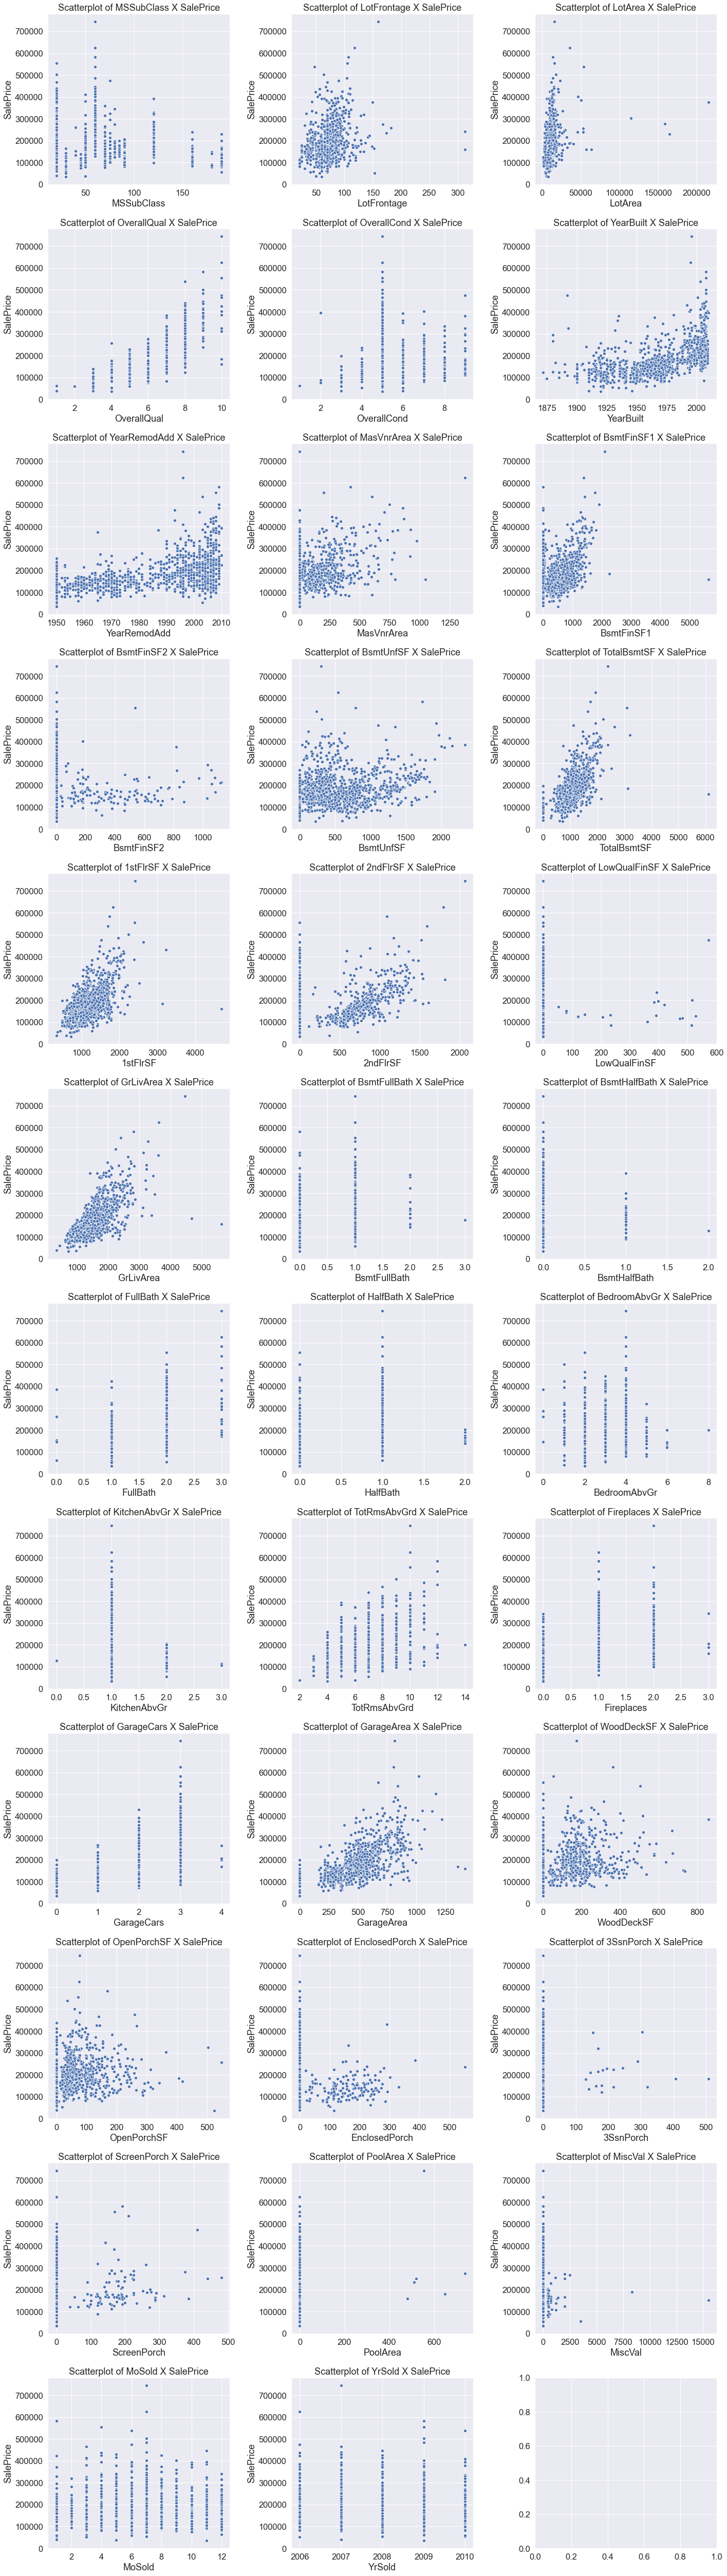

In [35]:
# Plotting Scatterplot for all Non-Categorical features

fig,ax=plt.subplots(len(Non_categorical_features)//3+1,3,figsize=(20,len(Non_categorical_features)*2))
for id,featr in enumerate(Non_categorical_features):
    sns.scatterplot(x=X_train[featr],y=Y_train,ax=ax[id//3,id%3])
    ax[id//3,id%3].set_title(f'Scatterplot of {featr} X SalePrice')
    
plt.tight_layout()

# Feature Encoding (Using Binary Encoding)

In [36]:
from category_encoders.binary import BinaryEncoder

In [37]:
binry_encdr=BinaryEncoder(drop_invariant=True)
binry_encdr.fit(X_train)

BinaryEncoder(drop_invariant=True)

In [38]:
X_train_encoded=binry_encdr.transform(X_train)
X_train_encoded

MSSubClass  MSZoning_1  MSZoning_2  MSZoning_3  LotFrontage  LotArea  \
254           20           0           0           1         70.0     8400   
1066          60           0           0           1         59.0     7837   
638           30           0           0           1         67.0     8777   
799           50           0           0           1         60.0     7200   
380           50           0           0           1         50.0     5000   
...          ...         ...         ...         ...          ...      ...   
1095          20           0           0           1         78.0     9317   
1130          50           0           0           1         65.0     7804   
1294          20           0           0           1         60.0     8172   
860           50           0           0           1         55.0     7642   
1126         120           0           0           1         53.0     3684   

      Street_0  Street_1  LotShape_0  LotShape_1  LotShape_2  LandContour_0  \
254          0         1           0           0           1              0   
1066         0         1           0           1           0              0   
638          0         1           0           0           1              0   
799          0         1           0           0           1              0   
380          0         1           0           0           1              0   
...        ...       ...         ...         ...         ...            ...   
1095         0         1           0           1           0              0   
1130         0         1           0           0           1              0   
1294         0         1           0           0           1              0   
860          0         1           0           0           1              0   
1126         0         1           0           0           1              0   

      LandContour_1  LandContour_2  Utilities_0  Utilities_1  LotConfig_1  \
254               0              1            0            1            0   
1066              0              1            0            1            0   
638               0              1            0            1            0   
799               0              1            0            1            0   
380               0              1            0            1            0   
...             ...            ...          ...          ...          ...   
1095              0              1            0            1            0   
1130              0              1            0            1            0   
1294              0              1            0            1            0   
860               0              1            0            1            0   
1126              0              1            0            1            0   

      LotConfig_2  LotConfig_3  LandSlope_1  LandSlope_2  Neighborhood_1  \
254             0            1            0            1               0   
1066            0            1            0            1               0   
638             0            1            0            1               0   
799             1            0            0            1               0   
380             0            1            0            1               0   
...           ...          ...          ...          ...             ...   
1095            0            1            0            1               0   
1130            0            1            0            1               0   
1294            0            1            0            1               0   
860             1            0            0            1               0   
1126            0            1            0            1               1   

      Neighborhood_2  Neighborhood_3  Neighborhood_4  Neighborhood_5  \
254                0               0               0               1   
1066               0               0               1               0   
638                0               0               1              

# Manipulating X_test for Prediction

### Imputing X_test

In [39]:
# Imputing Missing Fireplace, Garage and Basment

X_test['FireplaceQu'].fillna('No Firplce',inplace=True)
X_test['GarageCond'].fillna('No Garage',inplace=True)
X_test['GarageType'].fillna('No Garage',inplace=True)
X_test['GarageQual'].fillna('No Garage',inplace=True)
X_test['GarageFinish'].fillna('No Garage',inplace=True)
X_test['BsmtQual'].fillna('No Bsmnt',inplace=True)
X_test['BsmtFinType2'].fillna('No Bsmnt',inplace=True)
X_test['BsmtCond'].fillna('No Bsmnt',inplace=True)
X_test['BsmtExposure'].fillna('No Bsmnt',inplace=True)
X_test['BsmtFinType1'].fillna('No Bsmnt',inplace=True)

In [40]:
# Continuous features to be imputed
med_msng_test = X_test[['MasVnrArea','LotFrontage']]

In [41]:
Median_Imputed_tst=median_imputer.transform(med_msng_test)
Median_Imputed_tst=pd.DataFrame(Median_Imputed_tst,columns=['MasVnrArea','LotFrontage'],index=med_msng_test.index)

In [42]:
# Categorical features to be imputed
freq_msg_test = X_test[['GarageYrBlt','Electrical','MasVnrType']]

In [43]:
Catgr_Imputed_tst=catgr_imputer.transform(freq_msg_test)
Catgr_Imputed_tst=pd.DataFrame(Catgr_Imputed_tst,columns=['GarageYrBlt','Electrical','MasVnrType'],index=freq_msg_test.index)

In [44]:
# All the values are imputed.
# Replacing imputed features from X_test

X_test[['MasVnrArea','LotFrontage']]=Median_Imputed_tst
X_test[['GarageYrBlt','Electrical','MasVnrType']]=Catgr_Imputed_tst

### Encoding X_test

In [45]:
X_test_encoded=binry_encdr.transform(X_test)
X_test_encoded

MSSubClass  MSZoning_1  MSZoning_2  MSZoning_3  LotFrontage  LotArea  \
892           20           0           0           1         70.0     8414   
1105          60           0           0           1         98.0    12256   
413           30           0           1           0         56.0     8960   
522           50           0           1           0         50.0     5000   
1036          20           0           0           1         89.0    12898   
...          ...         ...         ...         ...          ...      ...   
479           30           0           1           0         50.0     5925   
1361          20           0           0           1        124.0    16158   
802           60           0           0           1         63.0     8199   
651           70           0           0           1         60.0     9084   
722           20           0           0           1         70.0     8120   

      Street_0  Street_1  LotShape_0  LotShape_1  LotShape_2  LandContour_0  \
892          0         1           0           0           1              0   
1105         0         1           0           1           0              0   
413          0         1           0           0           1              0   
522          0         1           0           0           1              0   
1036         0         1           0           1           0              0   
...        ...       ...         ...         ...         ...            ...   
479          0         1           0           0           1              0   
1361         0         1           0           1           0              1   
802          0         1           0           0           1              0   
651          0         1           0           0           1              0   
722          0         1           0           0           1              0   

      LandContour_1  LandContour_2  Utilities_0  Utilities_1  LotConfig_1  \
892               0              1            0            1            0   
1105              0              1            0            1            0   
413               0              1            0            1            0   
522               0              1            0            1            0   
1036              1              1            0            1            0   
...             ...            ...          ...          ...          ...   
479               1              0            0            1            0   
1361              0              0            0            1            0   
802               0              1            0            1            0   
651               0              1            0            1            0   
722               0              1            0            1            0   

      LotConfig_2  LotConfig_3  LandSlope_1  LandSlope_2  Neighborhood_1  \
892             0            1            0            1               0   
1105            1            0            0            1               1   
413             0            1            0            1               0   
522             1            0            0            1               0   
1036            0            1            0            1               0   
...           ...          ...          ...          ...             ...   
479             0            1            0            1               0   
1361            0            1            1            0               1   
802             0            1            0            1               0   
651             0            1            0            1               0   
722             0            1            0            1               0   

      Neighborhood_2  Neighborhood_3  Neighborhood_4  Neighborhood_5  \
892                1               0               0               1   
1105               0               0               0               1   
413                1               0               1              

<Figure size 1440x576 with 0 Axes>

((array([-2.82405984, -2.5268341 , -2.35847189, -2.23845937, -2.14401259,
         -2.06553252, -1.99803001, -1.9385663 , -1.88525859, -1.83682524,
         -1.79235285, -1.75116654, -1.712753  , -1.6767123 , -1.64272657,
         -1.6105388 , -1.57993808, -1.55074915, -1.52282467, -1.49603959,
         -1.47028677, -1.44547373, -1.42152004, -1.39835531, -1.37591755,
         -1.35415189, -1.33300949, -1.31244672, -1.29242438, -1.27290718,
         -1.25386317, -1.23526335, -1.21708133, -1.199293  , -1.18187626,
         -1.16481085, -1.14807809, -1.13166074, -1.11554287, -1.09970971,
         -1.08414754, -1.0688436 , -1.05378598, -1.03896357, -1.02436598,
         -1.00998348, -0.99580691, -0.98182771, -0.96803779, -0.95442953,
         -0.94099577, -0.92772971, -0.91462495, -0.90167541, -0.88887533,
         -0.87621926, -0.86370201, -0.85131863, -0.83906446, -0.826935  ,
         -0.814926  , -0.8030334 , -0.7912533 , -0.77958199, -0.76801592,
         -0.7565517 , -0.74518605, -0.

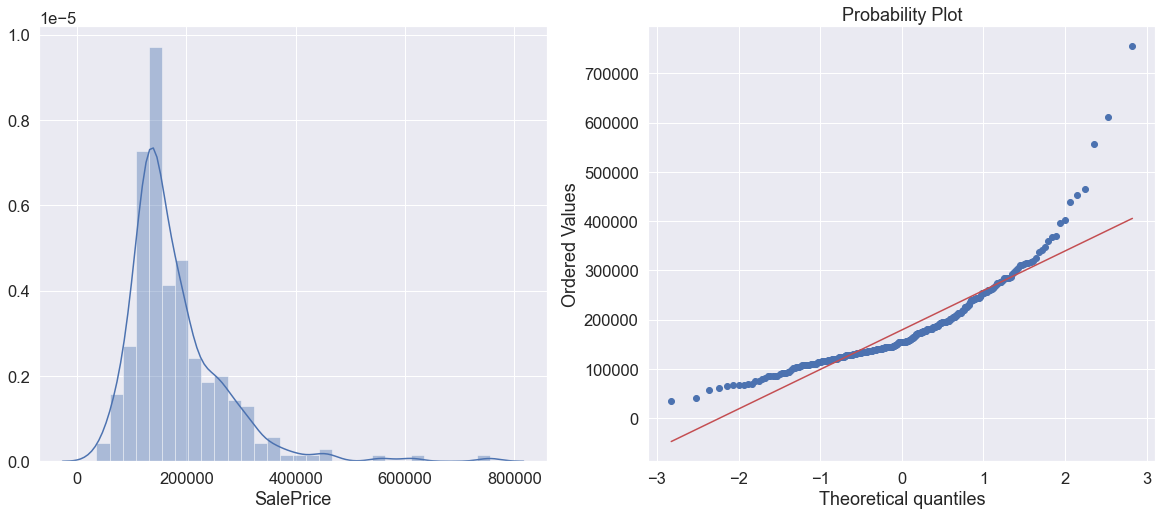

In [46]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(Y_test)
plt.subplot(1, 2, 2)
stats.probplot(Y_test,plot=plt)

# X_test is left skewed

In [47]:
# taking log of Y_test

Y_test_log=np.log(Y_test)

<Figure size 1440x576 with 0 Axes>

((array([-2.82405984, -2.5268341 , -2.35847189, -2.23845937, -2.14401259,
         -2.06553252, -1.99803001, -1.9385663 , -1.88525859, -1.83682524,
         -1.79235285, -1.75116654, -1.712753  , -1.6767123 , -1.64272657,
         -1.6105388 , -1.57993808, -1.55074915, -1.52282467, -1.49603959,
         -1.47028677, -1.44547373, -1.42152004, -1.39835531, -1.37591755,
         -1.35415189, -1.33300949, -1.31244672, -1.29242438, -1.27290718,
         -1.25386317, -1.23526335, -1.21708133, -1.199293  , -1.18187626,
         -1.16481085, -1.14807809, -1.13166074, -1.11554287, -1.09970971,
         -1.08414754, -1.0688436 , -1.05378598, -1.03896357, -1.02436598,
         -1.00998348, -0.99580691, -0.98182771, -0.96803779, -0.95442953,
         -0.94099577, -0.92772971, -0.91462495, -0.90167541, -0.88887533,
         -0.87621926, -0.86370201, -0.85131863, -0.83906446, -0.826935  ,
         -0.814926  , -0.8030334 , -0.7912533 , -0.77958199, -0.76801592,
         -0.7565517 , -0.74518605, -0.

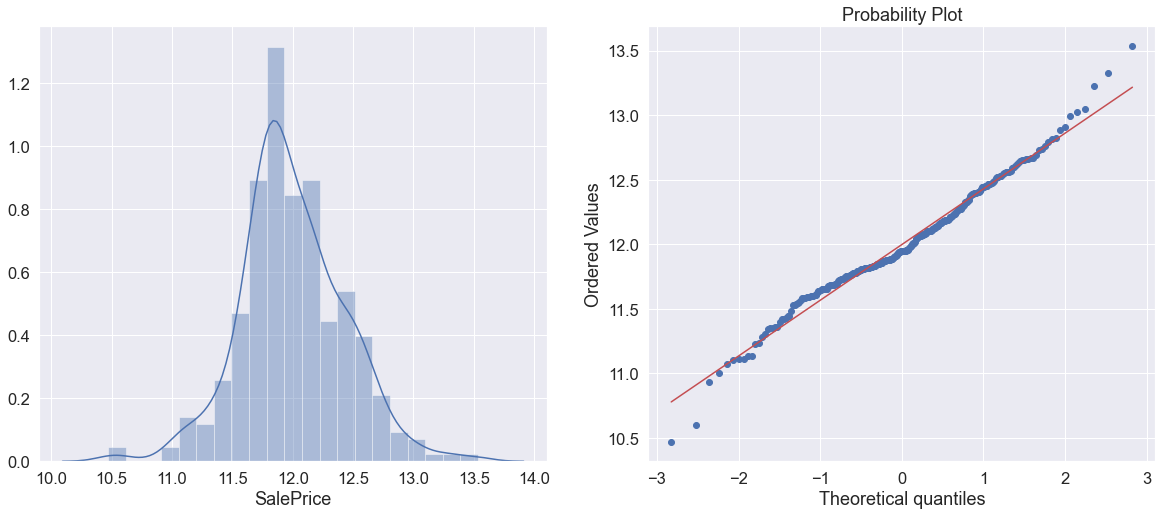

In [48]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(Y_test_log)
plt.subplot(1,2,2)
stats.probplot(Y_test_log,plot=plt)

# Prediction Using Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
RF=RandomForestRegressor(n_jobs=-1)

In [51]:
RF.fit(X_train_encoded,Y_train_log)

RandomForestRegressor(n_jobs=-1)

# On train

In [52]:
RF_prd_trn=RF.predict(X_train_encoded)

In [53]:
RF_prd_trn=np.exp(RF_prd_trn)

In [54]:
from sklearn.metrics import mean_absolute_error

In [55]:
print('Mean Absolute Error for train',mean_absolute_error(Y_train,RF_prd_trn))

Mean Absolute Error for train 6702.6474339132155


# On test

In [56]:
RF_prd_tst=RF.predict(X_test_encoded)

In [57]:
RF_prd_tst=np.exp(RF_prd_tst)

In [58]:
print('Mean Absolute Error for test',mean_absolute_error(Y_test,RF_prd_tst))

Mean Absolute Error for test 17589.84068092083


# Optimising Parameters for Random Forest

In [59]:
param={'n_estimators':[300,350,400,450,500],
       'max_depth':[9,10,11,12,13,14,15,None],
       'max_features':[0.2,0.3,0.4,0.5,'auto','sqrt'],
       'max_samples':[0.6,0.7,0.8,None]}

In [60]:
from sklearn.model_selection import GridSearchCV

RF_grid = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid=param,
                       scoring='neg_median_absolute_error',
                       n_jobs=-1,
                       verbose=1,
                       cv=5)

In [61]:
RF_grid.fit(X_train_encoded,Y_train_log)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 45.9min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [9, 10, 11, 12, 13, 14, 15, None],
                         'max_features': [0.2, 0.3, 0.4, 0.5, 'auto', 'sqrt'],
                         'max_samples': [0.6, 0.7, 0.8, None],
                         'n_estimators': [300, 350, 400, 450, 500]},
             scoring='neg_median_absolute_error', verbose=1)

In [62]:
RF_grid.best_params_

{'max_depth': None,
 'max_features': 0.3,
 'max_samples': 0.7,
 'n_estimators': 450}

In [63]:
# Random Forest best fit model

RF_bst_fit=RandomForestRegressor(n_estimators=350,
                                 max_depth=14,
                                 max_features=0.3,
                                 max_samples=0.6)

In [64]:
RF_bst_fit.fit(X_train_encoded,Y_train_log)

RandomForestRegressor(max_depth=14, max_features=0.3, max_samples=0.6,
                      n_estimators=350)

# On train

In [65]:
RF_bst_fit_prd_trn=RF_bst_fit.predict(X_train_encoded)
RF_bst_fit_prd_trn

array([11.86783251, 12.08603452, 11.41922395, ..., 11.68217867,
       12.0360302 , 12.15857847])

In [66]:
RF_bst_fit_prd_trn=np.exp(RF_bst_fit_prd_trn)
RF_bst_fit_prd_trn

array([142604.80849382, 177377.32530244,  91055.45047078, ...,
       118441.99973946, 168725.80072161, 190723.20621322])

In [67]:
print('Residual using best fit parameters on train:',mean_absolute_error(Y_train,RF_bst_fit_prd_trn))

Residual using best fit parameters on train: 9664.405429828505


# On test

In [68]:
RF_bst_fit_prd_tst=RF_bst_fit.predict(X_test_encoded)

In [69]:
RF_bst_fit_prd_tst=np.exp(RF_bst_fit_prd_tst)

In [70]:
print('Residual using best fit parameters on test:',mean_absolute_error(Y_test,RF_bst_fit_prd_tst))

Residual using best fit parameters on test: 17358.227758319994


# Feature Importance

In [71]:
def plot_feature_importance(model,model_algo):
        Featr_imp=pd.DataFrame({'Featr_name':list(X_train_encoded),'Featr_importnce':model.feature_importances_})
        Featr_imp.sort_values(by='Featr_importnce',ascending=False,inplace=True)
        
        # plotting feature importance
        plt.figure(figsize=(20,50))
        sns.barplot(x=Featr_imp['Featr_importnce'],y=Featr_imp['Featr_name'])
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.title(model_algo+"'s Feature Importance")

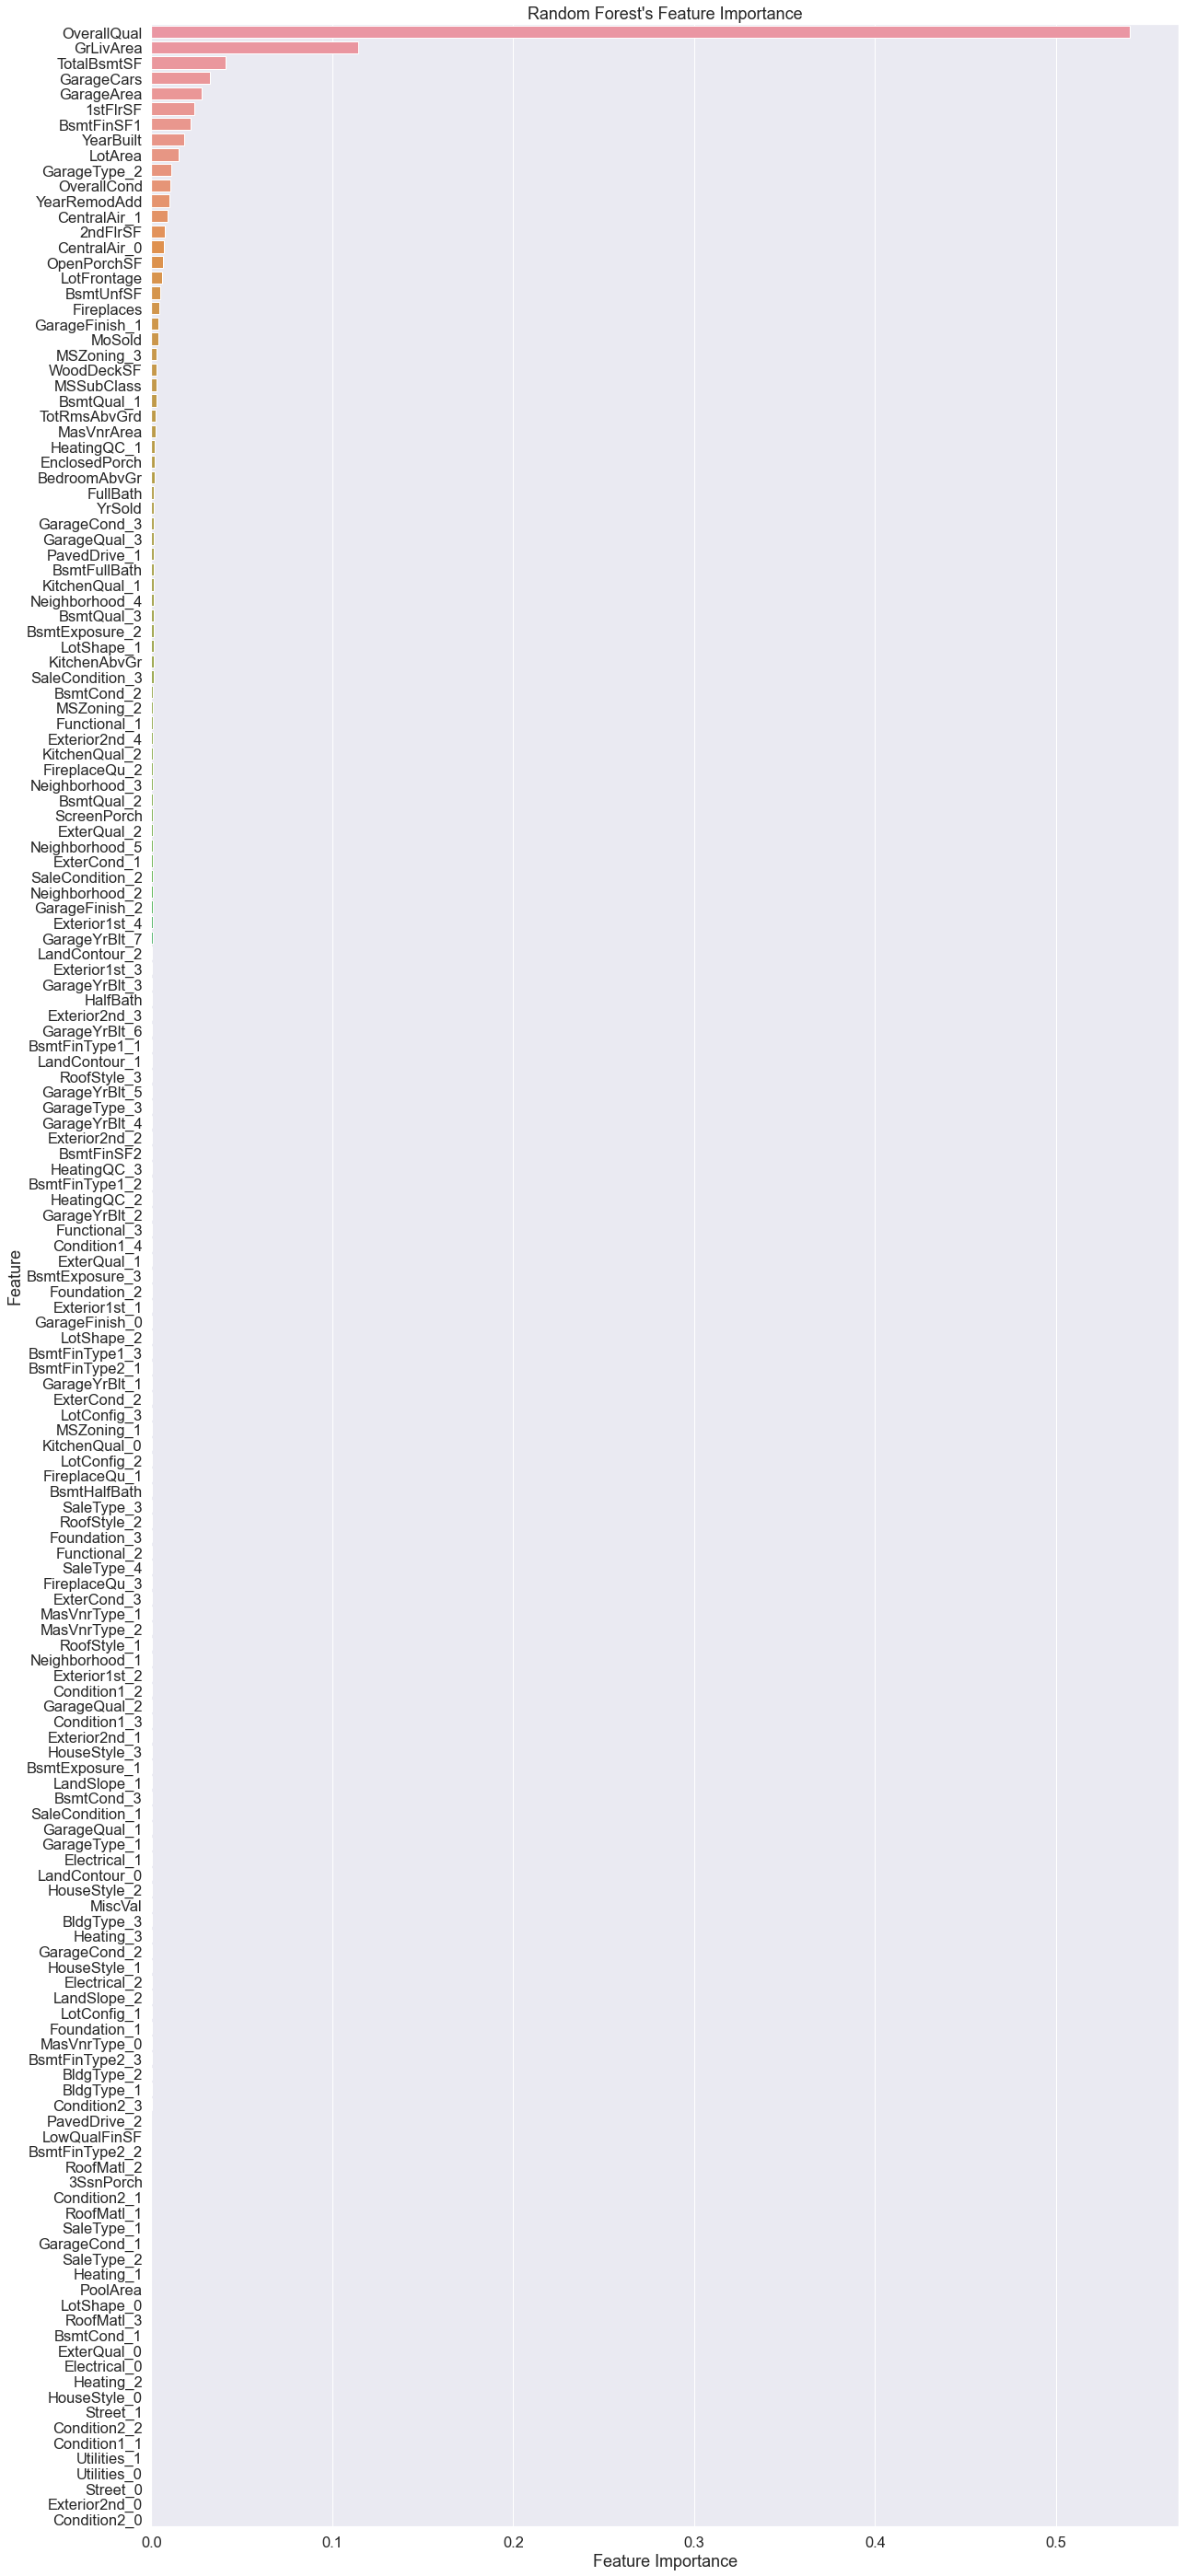

In [72]:
plot_feature_importance(RF,'Random Forest')

# Removing In significant features

In [73]:
# function to find features with importance less than the thresold

def featr_imprtnce(model,thrsld):
    data_frame=pd.DataFrame({'feature':list(X_train_encoded),'Feature_imp':model.feature_importances_})
    
    # feature imp less than thrs
    feat=[]
    for row in range(data_frame.shape[0]):
        if data_frame.iloc[row,1] < thrsld:
            feat.append(data_frame.iloc[row,0])
    return feat

In [74]:
# Features having importance less than 0.0015625
drop_featr=featr_imprtnce(RF,0.00078125)

In [75]:
# droping insignificant features from X_train
X_train_RF = X_train_encoded.drop(drop_featr,axis=1)

In [76]:
RF_imp = RandomForestRegressor(n_jobs=-1)

In [77]:
RF_imp.fit(X_train_RF,Y_train_log)

RandomForestRegressor(n_jobs=-1)

# On train

In [78]:
RF_imp_prd_trn=RF_imp.predict(X_train_RF)
RF_imp_prd_trn

array([11.8839495 , 12.08146309, 11.39071679, ..., 11.68078783,
       12.06612272, 12.08841513])

In [79]:
RF_imp_prd_trn=np.exp(RF_imp_prd_trn)
RF_imp_prd_trn

array([144921.7899224 , 176568.30680922,  88496.36829302, ...,
       118277.38113699, 173880.3543113 , 177800.09341253])

In [80]:
print('Residuals using Random Forest on train and using import feat:',mean_absolute_error(Y_train,RF_imp_prd_trn))

Residuals using Random Forest on train and using import feat: 6731.87475839547


# On test

In [81]:
X_test_RF=X_test_encoded.drop(drop_featr,axis=1)

In [82]:
RF_imp_prd_tst=RF_imp.predict(X_test_RF)

In [83]:
RF_imp_prd_tst=np.exp(RF_imp_prd_tst)

In [84]:
print('Residuals using Random Forest on test and using import feat',mean_absolute_error(Y_test,RF_imp_prd_tst))

Residuals using Random Forest on test and using import feat 17460.340276100455


# Parameter Tunning for Random forest on Significant features

In [85]:
RF_param={'n_estimators':[200,250,300,350,400],
          'max_depth':[12,13,14,15,None],
          'max_features':[0.1,0.2,0.3,0.4,0.5,'auto','sqrt'],
          'max_samples':[0.7,0.8,0.9,None]}

In [86]:
RF_grid_imp=GridSearchCV(estimator=RandomForestRegressor(),
                         param_grid=RF_param,
                         scoring='neg_median_absolute_error',
                         n_jobs=-1,
                         verbose=1,
                         cv=5)

In [92]:
RF_grid_imp.fit(X_train_RF,Y_train_log)

Fitting 5 folds for each of 700 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed: 17.4min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [12, 13, 14, 15, None],
                         'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 'auto',
                                          'sqrt'],
                         'max_samples': [0.7, 0.8, 0.9, None],
                         'n_estimators': [200, 250, 300, 350, 400]},
             scoring='neg_median_absolute_error', verbose=1)

In [93]:
RF_grid_imp.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.8,
 'n_estimators': 200}

In [87]:
RF_imp_best_fit=RandomForestRegressor(n_estimators=200,
                                      max_depth=None,
                                      max_features=0.2,
                                      max_samples=0.8)

In [88]:
RF_imp_best_fit.fit(X_train_RF,Y_train_log)

RandomForestRegressor(max_features=0.2, max_samples=0.8, n_estimators=200)

# On train

In [89]:
RF_imp_best_fit_prd_trn=RF_imp_best_fit.predict(X_train_RF)
RF_imp_best_fit_prd_trn

array([11.88505773, 12.09097689, 11.4014323 , ..., 11.67737399,
       12.03296692, 12.13349538])

In [90]:
RF_imp_best_fit_prd_trn=np.exp(RF_imp_best_fit_prd_trn)
RF_imp_best_fit_prd_trn

array([145082.48667763, 178256.15829673,  89449.75088918, ...,
       117874.288643  , 168209.73756112, 185998.77838257])

In [91]:
print('Residuals on best fit and using significant features on train',mean_absolute_error(Y_train,RF_imp_best_fit_prd_trn))

Residuals on best fit and using significant features on train 7732.638115230619


# On test

In [92]:
RF_imp_best_fit_prd_tst=RF_imp_best_fit.predict(X_test_RF)

In [93]:
RF_imp_best_fit_prd_tst=np.exp(RF_imp_best_fit_prd_tst)

In [94]:
print('Residuals on best fit and using significant features on test',mean_absolute_error(Y_test,RF_imp_best_fit_prd_tst))

Residuals on best fit and using significant features on test 17165.129181347915


# Prediction using XGBoost

In [95]:
from xgboost import XGBRegressor

In [96]:
XGB=XGBRegressor()

In [97]:
XGB.fit(X_train_encoded,Y_train_log)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# On train

In [98]:
XGB_prd_trn=XGB.predict(X_train_encoded)
XGB_prd_trn

array([11.88496 , 12.091384, 11.351771, ..., 11.654474, 12.149896,
       12.065029], dtype=float32)

In [99]:
XGB_prd_trn=np.exp(XGB_prd_trn)
XGB_prd_trn

array([145068.33 , 178328.73 ,  85116.086, ..., 115205.67 , 189074.36 ,
       173690.31 ], dtype=float32)

In [100]:
print('Residual on train using XGBoost:',mean_absolute_error(Y_train,XGB_prd_trn))

Residual on train using XGBoost: 677.1024353863442


# On test

In [101]:
XGB_prd_tst=XGB.predict(X_test_encoded)

In [102]:
XGB_prd_tst=np.exp(XGB_prd_tst)

In [103]:
print('Residuals on test uding XGBoost:',mean_absolute_error(Y_test,XGB_prd_tst))
# from the residuals we can say the model is overfitting

Residuals on test uding XGBoost: 18204.014180222603


# Optimising Parameters for XGBoost

In [104]:
XGB_param={'n_estimators':[600,650,700,750,800,850],
           'max_depth':[8,9,10,11,12,13,14],
           'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.06],
           'colsample_bytree':[0.3,0.4,0.5,0.6,0.7,0.8],
           'subsample':[0.3,0.4,0.5,0.6,0.7,0.8]}

In [105]:
XGB_grid=GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror',tree_method='gpu_hist'),
                      param_grid=XGB_param,
                      scoring='neg_mean_absolute_error',
                      n_jobs=-1,
                      verbose=1,
                      cv=5)

In [72]:
XGB_grid.fit(X_train_encoded,Y_train_log)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 72.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 134.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 210.4min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 269.2min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method='gpu_hist',
         

In [73]:
XGB_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.04,
 'max_depth': 11,
 'n_estimators': 600,
 'subsample': 0.6}

In [106]:
XGB_bf=XGBRegressor(n_estimators=600,
                    max_depth=11,
                    learning_rate=0.04,
                    colsample_bytree=0.5,
                    subsample=0.6)

In [107]:
XGB_bf.fit(X_train_encoded,Y_train_log)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.04, max_delta_step=0, max_depth=11,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

# On train

In [108]:
XGB_bf_prd_trn=XGB_bf.predict(X_train_encoded)
XGB_bf_prd_trn

array([11.8841305, 12.089879 , 11.350563 , ..., 11.653335 , 12.152997 ,
       12.067636 ], dtype=float32)

In [109]:
XGB_bf_prd_trn=np.exp(XGB_bf_prd_trn)
XGB_bf_prd_trn

array([144948.02 , 178060.56 ,  85013.305, ..., 115074.45 , 189661.66 ,
       174143.61 ], dtype=float32)

In [110]:
print('Residual after parameter tunning on train:',mean_absolute_error(Y_train,XGB_bf_prd_trn))

Residual after parameter tunning on train: 102.95176383240582


# On test

In [111]:
XGB_bf_prd_tst=XGB_bf.predict(X_test_encoded)

In [112]:
XGB_bf_prd_tst=np.exp(XGB_bf_prd_tst)

In [113]:
print('Residual after parameter tuning on test:',mean_absolute_error(Y_test,XGB_bf_prd_tst))

Residual after parameter tuning on test: 16746.656664704624


# Significant features for XGBoost

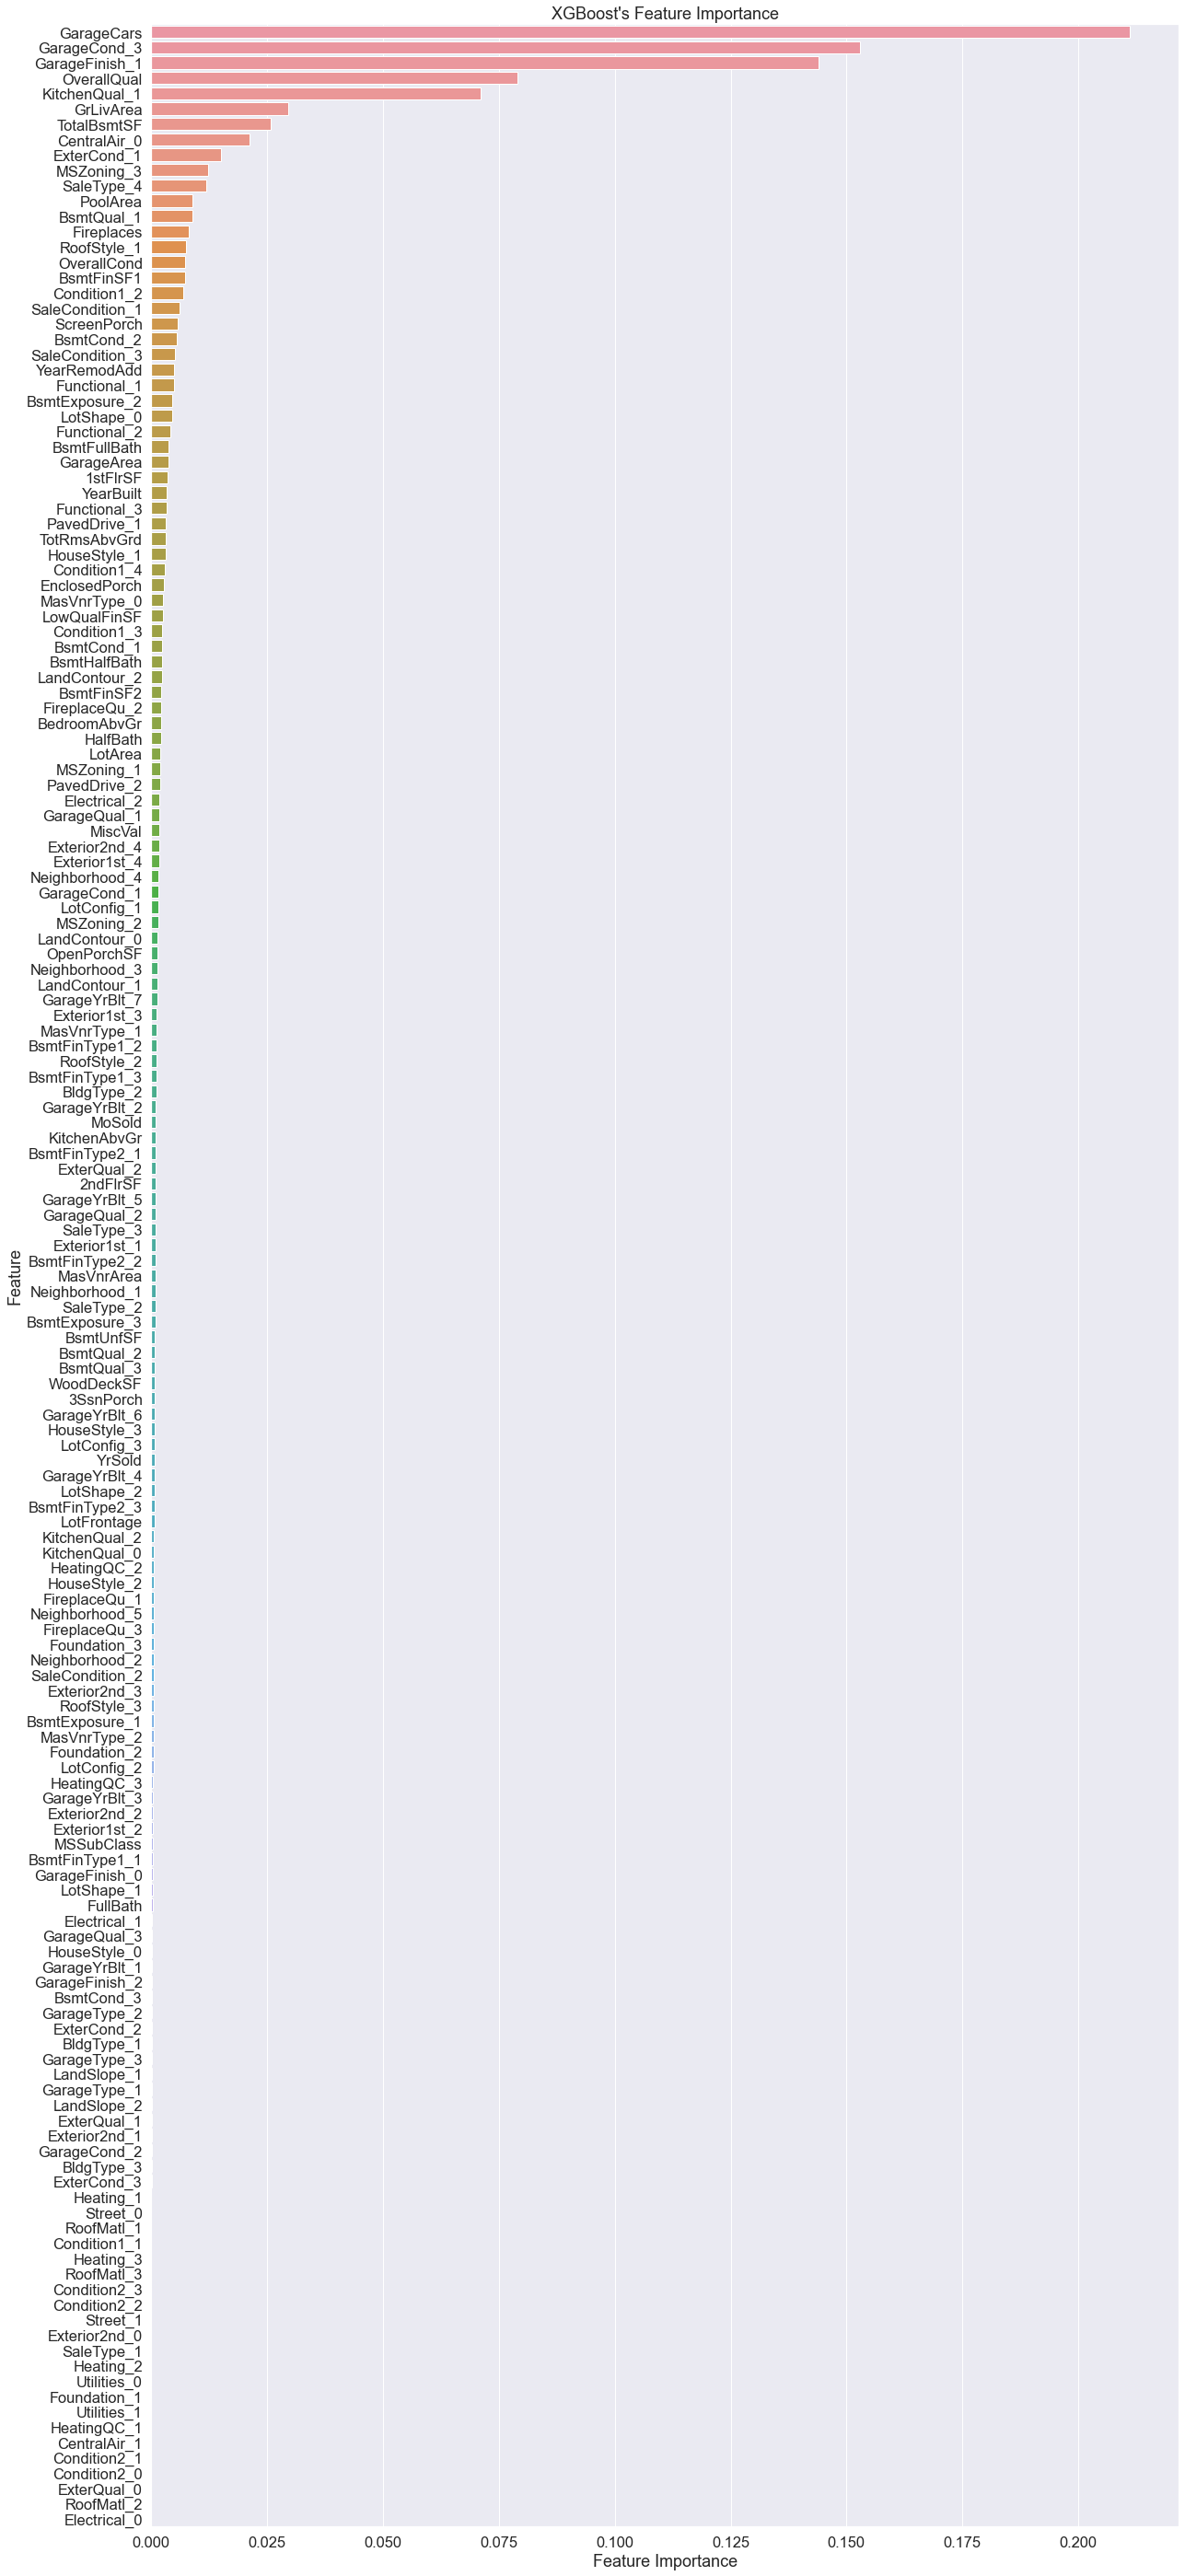

In [114]:
plot_feature_importance(XGB,'XGBoost')

In [115]:
XGB_drop_featr=featr_imprtnce(XGB,0.0015625) # insignificant features needs to be dropped

In [116]:
X_train_XGB=X_train_encoded.drop(XGB_drop_featr,axis=1)

In [117]:
XGB_imp=XGBRegressor()

In [118]:
XGB_imp.fit(X_train_XGB,Y_train_log)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# On train

In [119]:
XGB_imp_prd_trn=XGB_imp.predict(X_train_XGB)
XGB_imp_prd_trn

array([11.878646, 12.088664, 11.353803, ..., 11.674788, 12.139688,
       12.080022], dtype=float32)

In [120]:
XGB_imp_prd_trn=np.exp(XGB_imp_prd_trn)
XGB_imp_prd_trn

array([144155.22 , 177844.36 ,  85289.164, ..., 117569.914, 187154.08 ,
       176314.02 ], dtype=float32)

In [121]:
print('Residual after removing insignificant features from train:',mean_absolute_error(Y_train,XGB_imp_prd_trn))

Residual after removing insignificant features from train: 1249.8160450556506


# On test

In [122]:
X_test_XGB=X_test_encoded.drop(XGB_drop_featr,axis=1)

In [123]:
XGB_imp_prd_tst=XGB_imp.predict(X_test_XGB)

In [124]:
XGB_imp_prd_tst=np.exp(XGB_imp_prd_tst)

In [125]:
print('Residual after removing insignificant features from test:',mean_absolute_error(Y_test,XGB_imp_prd_tst))

# Residual for test is better after removing insignificant features but can be improved more using parameter tuning.

Residual after removing insignificant features from test: 17954.18387467894


# Parameter Tunning for XGBoost on Significant features

In [126]:
XGB_imp_param={'n_estimators':[1400,1450,1500,1550,1600],
               'learning_rate':[0.01,0.02,0.03,0.04],
               'max_depth':[3,4,5],
               'subsample':[0.2,0.3,0.4,0.5,0.6],
               'colsample_bytree':[0.4,0.5,0.6,0.7]}

In [127]:
XGB_imp_grd=GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror',tree_method='gpu_hist'),
                         param_grid=XGB_imp_param,
                         scoring='neg_mean_absolute_error',
                         n_jobs=-1,
                         verbose=1,
                         cv=5)

In [59]:
XGB_imp_grd.fit(X_train_XGB,Y_train_log)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 66.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 97.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 133.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 177.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 226.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 283.1min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 348.3min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method='gpu_hist',
                                    validate_parameters=None, verbosity=None),
         

In [60]:
XGB_imp_grd.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.02,
 'max_depth': 4,
 'n_estimators': 1550,
 'subsample': 0.3}

In [128]:
XGB_imp_bf = XGBRegressor(n_estimators=1550,
                          max_depth=4,
                          colsample_bytree=0.5,
                          learning_rate=0.02,
                          subsample=0.3)

In [129]:
XGB_imp_bf.fit(X_train_XGB,Y_train_log)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1550, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
             tree_method='exact', validate_parameters=1, verbosity=None)

# On train

In [130]:
XGB_imp_bf_prd_trn=XGB_imp_bf.predict(X_train_XGB)
XGB_imp_bf_prd_trn

array([11.879812, 12.081343, 11.338178, ..., 11.684885, 12.063759,
       12.170337], dtype=float32)

In [131]:
XGB_imp_bf_prd_trn=np.exp(XGB_imp_bf_prd_trn)
XGB_imp_bf_prd_trn

array([144323.45 , 176547.05 ,  83966.875, ..., 118762.98 , 173469.81 ,
       192979.02 ], dtype=float32)

In [132]:
from sklearn.metrics import mean_absolute_error

In [133]:
print('Residual after removing insignificant feature and best fit parameters:',mean_absolute_error(Y_train,XGB_imp_bf_prd_trn))

Residual after removing insignificant feature and best fit parameters: 6716.880856030608


# On test

In [134]:
XGB_imp_bf_prd_tst=XGB_imp_bf.predict(X_test_XGB)

In [135]:
XGB_imp_bf_prd_tst=np.exp(XGB_imp_bf_prd_tst)

In [136]:
print('Residual after removing insignificant feature and best fit parameters:',mean_absolute_error(Y_test,XGB_imp_bf_prd_tst))

Residual after removing insignificant feature and best fit parameters: 15581.162938784246


# Prediction Using Catboost

In [137]:
from catboost import CatBoostRegressor

In [138]:
Catbst = CatBoostRegressor(verbose=200)

In [139]:
# All the categorical features in the dataset
cat_featr_colmn=('MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
           'Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st',
           'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
           'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition')

# list of column index for categorical features
cat_featr=list(X_train.columns.get_loc(col) for col in cat_featr_colmn)

In [140]:
Catbst.fit(X=X_train,y=Y_train_log,cat_features=cat_featr,eval_set=(X_test,Y_test_log),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.04745
0:	learn: 0.3784921	test: 0.4211545	best: 0.4211545 (0)	total: 171ms	remaining: 2m 51s
200:	learn: 0.0917029	test: 0.1373948	best: 0.1373948 (200)	total: 6.08s	remaining: 24.2s
400:	learn: 0.0708213	test: 0.1327038	best: 0.1327038 (400)	total: 11.8s	remaining: 17.7s
600:	learn: 0.0590194	test: 0.1317237	best: 0.1315517 (547)	total: 17.8s	remaining: 11.8s
800:	learn: 0.0505386	test: 0.1310584	best: 0.1310022 (795)	total: 23.7s	remaining: 5.89s
999:	learn: 0.0433946	test: 0.1311687	best: 0.1309505 (807)	total: 29.8s	remaining: 0us

bestTest = 0.1309505042
bestIteration = 807

Shrink model to first 808 iterations.


# On train

In [141]:
Catbst_prd_trn=Catbst.predict(X_train)
Catbst_prd_trn

array([11.87578748, 12.07966671, 11.35761263, ..., 11.65801141,
       12.06780754, 12.14860878])

In [142]:
Catbst_prd_trn=np.exp(Catbst_prd_trn)
Catbst_prd_trn

array([143743.74966111, 176251.40764953,  85614.7299341 , ...,
       115613.89247852, 174173.55814661, 188831.20202163])

In [143]:
from sklearn.metrics import mean_absolute_error

In [144]:
print('Residual using Catboost on train:',mean_absolute_error(Y_train,Catbst_prd_trn))

Residual using Catboost on train: 7782.011938149901


# On test

In [145]:
Catbst_prd_tst=Catbst.predict(X_test)

In [146]:
Catbst_prd_tst=np.exp(Catbst_prd_tst)

In [147]:
print('Residual using Catboost on test:',mean_absolute_error(Y_test,Catbst_prd_tst))

Residual using Catboost on test: 15370.011259312463


# Optimising Parameters for Catboost

In [84]:
catbst_param={'iterations':[1400,1450,1500,1550,1600],
              'eta':[0.02,0.03,0.04,0.05],
              'depth':[3,4,5,6],
              'colsample_bylevel':[0.2,0.3,0.4,0.5]}

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
catbst_grid=GridSearchCV(estimator=CatBoostRegressor(verbose=200),
                         param_grid=catbst_param,
                         scoring='neg_mean_absolute_error',
                         n_jobs=-1,
                         verbose=1,
                         cv=5)

In [87]:
catbst_grid.fit(X=X_train,y=Y_train_log,cat_features=cat_featr,eval_set=(X_test,Y_test_log),plot=True)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 92.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 177.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 301.2min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed: 415.1min finished


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3799575	test: 0.4220390	best: 0.4220390 (0)	total: 17.7ms	remaining: 27.4s
200:	learn: 0.1005866	test: 0.1377346	best: 0.1377346 (200)	total: 3.06s	remaining: 20.5s
400:	learn: 0.0808531	test: 0.1326479	best: 0.1326479 (400)	total: 5.9s	remaining: 16.9s
600:	learn: 0.0694566	test: 0.1317564	best: 0.1316711 (590)	total: 8.89s	remaining: 14s
800:	learn: 0.0609017	test: 0.1310134	best: 0.1310134 (800)	total: 11.8s	remaining: 11.1s
1000:	learn: 0.0544829	test: 0.1311334	best: 0.1309923 (882)	total: 15.2s	remaining: 8.35s
1200:	learn: 0.0490710	test: 0.1310426	best: 0.1308927 (1110)	total: 18.2s	remaining: 5.28s
1400:	learn: 0.0446451	test: 0.1311019	best: 0.1308927 (1110)	total: 21.2s	remaining: 2.25s
1549:	learn: 0.0417164	test: 0.1313610	best: 0.1308927 (1110)	total: 23.5s	remaining: 0us

bestTest = 0.1308926859
bestIteration = 1110

Shrink model to first 1111 iterations.


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002A93D7CAD00>,
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.2, 0.3, 0.4, 0.5],
                         'depth': [3, 4, 5, 6], 'eta': [0.02, 0.03, 0.04, 0.05],
                         'iterations': [1400, 1450, 1500, 1550, 1600]},
             scoring='neg_mean_absolute_error', verbose=1)

In [88]:
catbst_grid.best_params_

{'colsample_bylevel': 0.3, 'depth': 5, 'eta': 0.05, 'iterations': 1550}

In [119]:
catbst_bst_fit=CatBoostRegressor(iterations=1500,
                                 eta=0.06,
                                 colsample_bylevel=0.3, 
                                 depth=5,
                                 verbose=200)

In [120]:
catbst_bst_fit.fit(X=X_train,y=Y_train_log,cat_features=cat_featr,plot=True,eval_set=(X_test,Y_test_log))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3778874	test: 0.4198184	best: 0.4198184 (0)	total: 19.1ms	remaining: 28.7s
200:	learn: 0.0960309	test: 0.1436644	best: 0.1436644 (200)	total: 3.3s	remaining: 21.4s
400:	learn: 0.0756416	test: 0.1375864	best: 0.1375864 (400)	total: 6.26s	remaining: 17.2s
600:	learn: 0.0632063	test: 0.1361611	best: 0.1361021 (559)	total: 9.25s	remaining: 13.8s
800:	learn: 0.0547472	test: 0.1359878	best: 0.1359726 (778)	total: 12.2s	remaining: 10.6s
1000:	learn: 0.0480375	test: 0.1354825	best: 0.1354681 (998)	total: 15.2s	remaining: 7.59s
1200:	learn: 0.0428328	test: 0.1350538	best: 0.1350538 (1200)	total: 18.5s	remaining: 4.6s
1400:	learn: 0.0378003	test: 0.1348115	best: 0.1347486 (1390)	total: 21.5s	remaining: 1.52s
1499:	learn: 0.0358144	test: 0.1348510	best: 0.1347486 (1390)	total: 23s	remaining: 0us

bestTest = 0.1347486164
bestIteration = 1390

Shrink model to first 1391 iterations.


# On train

In [121]:
catbst_bst_fit_prd_trn=catbst_bst_fit.predict(X_train)
catbst_bst_fit_prd_trn

array([11.85447919, 12.08459665, 11.37929898, ..., 11.69343441,
       12.06575511, 12.14126281])

In [122]:
catbst_bst_fit_prd_trn=np.exp(catbst_bst_fit_prd_trn)
catbst_bst_fit_prd_trn

array([140713.21868558, 177122.46228061,  87491.68018183, ...,
       119782.68334422, 173816.44538958, 187449.13493284])

In [123]:
print('Residual after parameter tunning on train:',mean_absolute_error(Y_train,catbst_bst_fit_prd_trn))

Residual after parameter tunning on train: 6536.4507629673735


# On test

In [124]:
catbst_bst_fit_prd_tst=catbst_bst_fit.predict(X_test)

In [125]:
catbst_bst_fit_prd_tst=np.exp(catbst_bst_fit_prd_tst)

In [126]:
print('Residual after parameter tunning on test:',mean_absolute_error(Y_test,catbst_bst_fit_prd_tst))

Residual after parameter tunning on test: 15615.65197063868


# Removing Insignificant features for Catboost

In [71]:
def catbst_feature_importance(model,model_algo):
        Featr_imp=pd.DataFrame({'Featr_name':list(X_train),'Featr_importnce':model.feature_importances_})
        Featr_imp.sort_values(by='Featr_importnce',ascending=False,inplace=True)
        
        # plotting feature importance
        plt.figure(figsize=(20,25))
        sns.barplot(x=Featr_imp['Featr_importnce'],y=Featr_imp['Featr_name'])
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.title(model_algo+"'s Feature Importance")

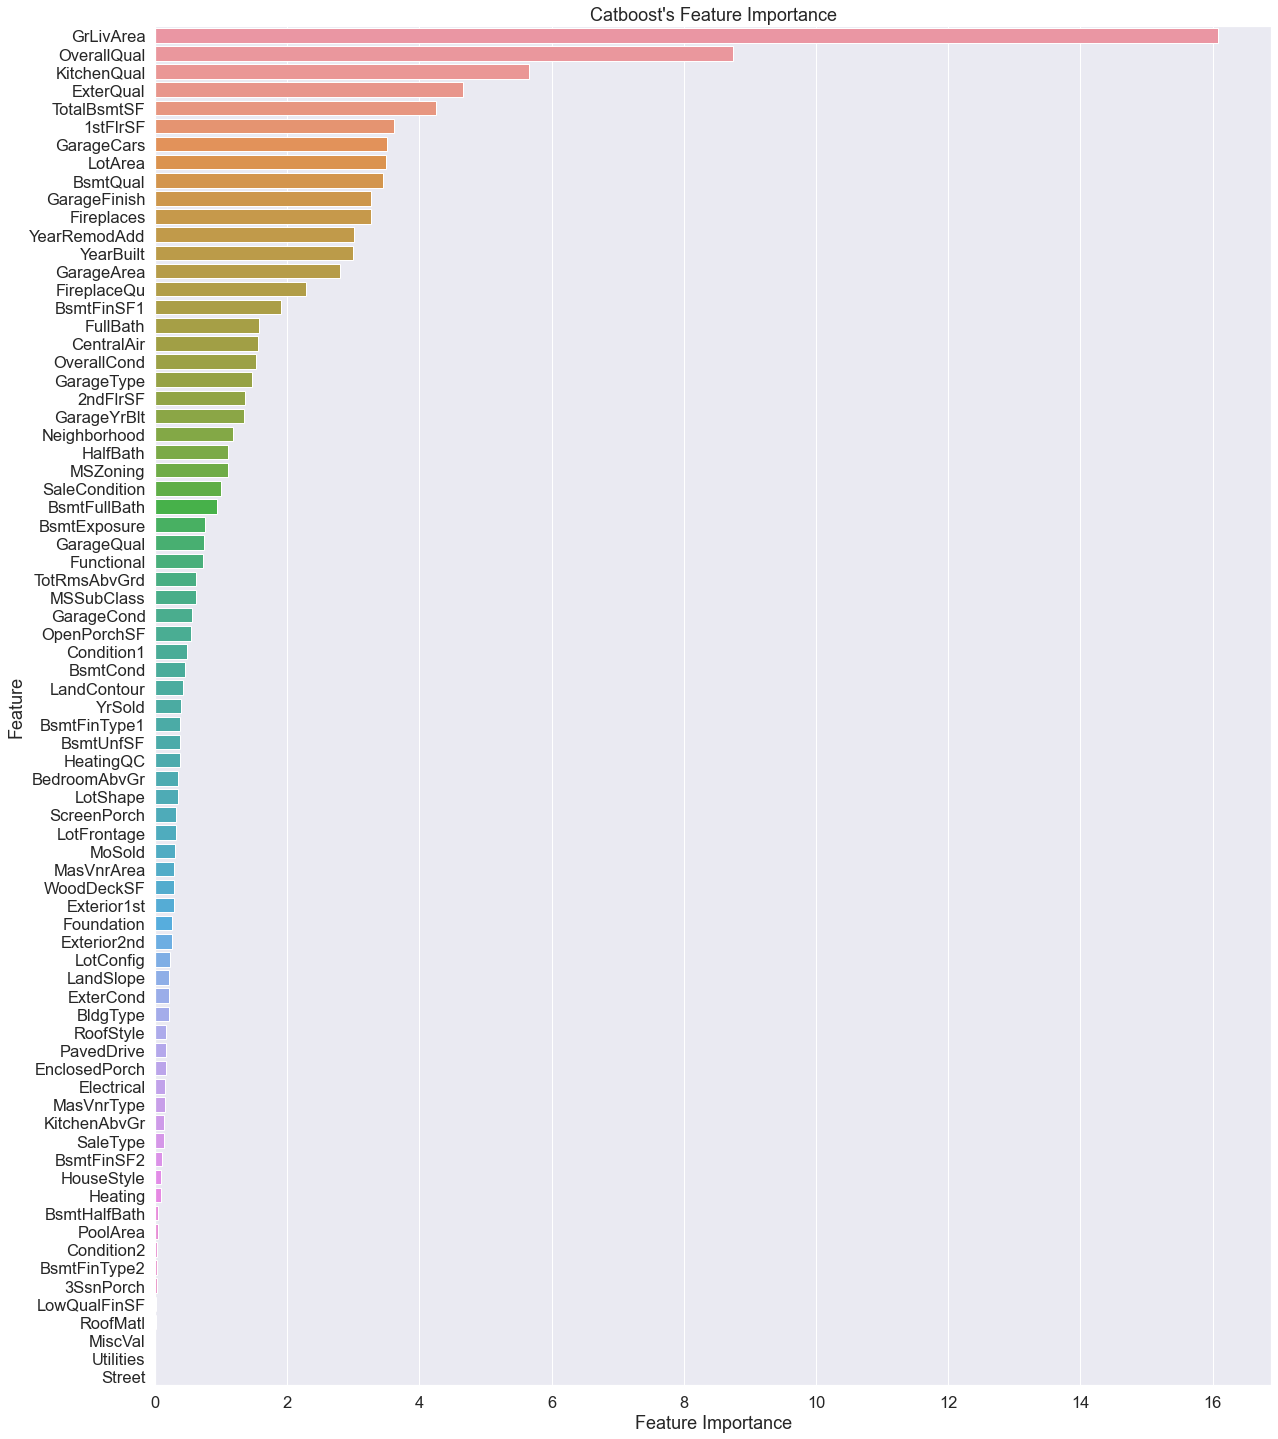

In [72]:
catbst_feature_importance(catbst_bst_fit,'Catboost')

In [73]:
# function to find features with importance less than the thresold for Catboost

def catbst_featr_imprtnce(model,thrsld):
    data_frame=pd.DataFrame({'feature':list(X_train),'Feature_imp':model.feature_importances_})
    
    # feature imp less than thrs
    feat=[]
    for row in range(data_frame.shape[0]):
        if data_frame.iloc[row,1] < thrsld:
            feat.append(data_frame.iloc[row,0])
    return feat

In [74]:
catbst_drop=catbst_featr_imprtnce(catbst_bst_fit,1.1)

In [75]:
X_train_cat=X_train.drop(catbst_drop,axis=1)

In [76]:
cat_feat_encd=('MSZoning','Neighborhood','OverallQual','OverallCond','ExterQual','BsmtQual','CentralAir','KitchenQual',
               'FireplaceQu','GarageType','GarageFinish')

In [77]:
catbst_imp = CatBoostRegressor(verbose=100)

In [78]:
catbst_imp.fit(X=X_train_cat,y=Y_train_log,cat_features=cat_feat_encd,plot=True)

Learning rate set to 0.040124


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3800423	total: 25.2ms	remaining: 25.2s
100:	learn: 0.1241363	total: 2.03s	remaining: 18.1s
200:	learn: 0.1029865	total: 3.9s	remaining: 15.5s
300:	learn: 0.0907914	total: 5.61s	remaining: 13s
400:	learn: 0.0831588	total: 7.34s	remaining: 11s
500:	learn: 0.0770322	total: 9.09s	remaining: 9.05s
600:	learn: 0.0715683	total: 10.8s	remaining: 7.18s
700:	learn: 0.0660180	total: 12.6s	remaining: 5.37s
800:	learn: 0.0615697	total: 14.4s	remaining: 3.58s
900:	learn: 0.0578033	total: 16.1s	remaining: 1.77s
999:	learn: 0.0540465	total: 17.9s	remaining: 0us


# On train

In [79]:
catbst_imp_prd_trn=catbst_imp.predict(X_train_cat)
catbst_imp_prd_trn

array([11.87581518, 12.09937693, 11.38172339, ..., 11.70494162,
       12.08670243, 12.12989385])

In [80]:
catbst_imp_prd_trn=np.exp(catbst_imp_prd_trn)
catbst_imp_prd_trn

array([143747.731893  , 179759.82410039,  87704.05243559, ...,
       121169.00894949, 177495.83568056, 185330.10139355])

In [81]:
print('Residual after removing insignificant features on train',mean_absolute_error(Y_train,catbst_imp_prd_trn))

Residual after removing insignificant features on train 8080.55637616425


# On test

In [82]:
# Droping insignificant features from test
X_test_cat=X_test.drop(catbst_drop,axis=1)

In [83]:
catbst_imp_prd_tst=catbst_imp.predict(X_test_cat)

In [84]:
catbst_imp_prd_tst=np.exp(catbst_imp_prd_tst)

In [85]:
print('Residual after removing insignificant features on test',mean_absolute_error(Y_test,catbst_imp_prd_tst))

Residual after removing insignificant features on test 15350.688771865834


# Parameter Optimisation for Significant feature using Catboost

In [86]:
catbst_imp_param={'iterations':[1300,1400,1500,1600],
                  'learning_rate':[0.02,0.03,0.04,0.05],
                  'depth':[3,4,5,6],
                  'rsm':[0.3,0.4,0.5,0.6]}

In [87]:
catbst_imp_grid=GridSearchCV(estimator=CatBoostRegressor(verbose=100),
                             param_grid=catbst_imp_param,
                             scoring='neg_mean_absolute_error',
                             n_jobs=-1,
                             verbose=1,
                             cv=5)

In [92]:
catbst_imp_grid.fit(X=X_train_cat,y=Y_train_log,cat_features=cat_feat_encd,plot=True,eval_set=(X_test_cat,Y_test_log))    

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 68.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 121.6min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 208.5min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 237.8min finished


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3834971	test: 0.4263592	best: 0.4263592 (0)	total: 11.2ms	remaining: 16.7s
100:	learn: 0.1509167	test: 0.1743767	best: 0.1743767 (100)	total: 927ms	remaining: 12.8s
200:	learn: 0.1244164	test: 0.1494595	best: 0.1494595 (200)	total: 1.61s	remaining: 10.4s
300:	learn: 0.1135481	test: 0.1433768	best: 0.1433525 (299)	total: 2.28s	remaining: 9.1s
400:	learn: 0.1064295	test: 0.1402390	best: 0.1402390 (400)	total: 2.91s	remaining: 7.97s
500:	learn: 0.1010397	test: 0.1378700	best: 0.1378389 (497)	total: 3.6s	remaining: 7.17s
600:	learn: 0.0974051	test: 0.1369349	best: 0.1369023 (597)	total: 4.24s	remaining: 6.34s
700:	learn: 0.0941210	test: 0.1367654	best: 0.1367287 (697)	total: 4.9s	remaining: 5.59s
800:	learn: 0.0912635	test: 0.1361248	best: 0.1361147 (798)	total: 5.58s	remaining: 4.87s
900:	learn: 0.0888239	test: 0.1360967	best: 0.1360223 (807)	total: 6.21s	remaining: 4.13s
1000:	learn: 0.0861596	test: 0.1361485	best: 0.1359988 (970)	total: 6.87s	remaining: 3.42s
1100:	learn: 0.

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002A1E7464F10>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6],
                         'iterations': [800, 900, 1000, 1100, 1200, 1300, 1400,
                                        1500],
                         'learning_rate': [0.03, 0.04, 0.05],
                         'rsm': [0.3, 0.4, 0.5, 0.6]},
             scoring='neg_mean_absolute_error', verbose=1)

In [93]:
catbst_imp_grid.best_params_

{'depth': 4, 'iterations': 1500, 'learning_rate': 0.03, 'rsm': 0.4}

In [101]:
catbst_imp_bf=CatBoostRegressor(iterations=1269,
                                learning_rate=0.03,
                                depth=4,
                                rsm=00.4,
                                verbose=200)

In [102]:
catbst_imp_bf.fit(X_train_cat,Y_train_log,plot=True,eval_set=(X_test_cat,Y_test_log),cat_features=cat_feat_encd)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3834971	test: 0.4263592	best: 0.4263592 (0)	total: 12ms	remaining: 15.2s
200:	learn: 0.1244164	test: 0.1494595	best: 0.1494595 (200)	total: 1.9s	remaining: 10.1s
400:	learn: 0.1064295	test: 0.1402390	best: 0.1402390 (400)	total: 3.52s	remaining: 7.62s
600:	learn: 0.0974051	test: 0.1369349	best: 0.1369023 (597)	total: 5.16s	remaining: 5.74s
800:	learn: 0.0912635	test: 0.1361248	best: 0.1361147 (798)	total: 6.81s	remaining: 3.98s
1000:	learn: 0.0861596	test: 0.1361485	best: 0.1359988 (970)	total: 8.42s	remaining: 2.25s
1200:	learn: 0.0814290	test: 0.1355518	best: 0.1355518 (1200)	total: 10.1s	remaining: 572ms
1268:	learn: 0.0799164	test: 0.1352901	best: 0.1352901 (1268)	total: 10.7s	remaining: 0us

bestTest = 0.1352901274
bestIteration = 1268



# On train

In [103]:
catbst_imp_bf_prd_trn=catbst_imp_bf.predict(X_train_cat)
catbst_imp_bf_prd_trn

array([11.86636657, 12.10606779, 11.38460918, ..., 11.70624144,
       12.06469108, 12.18595865])

In [104]:
catbst_imp_bf_prd_trn=np.exp(catbst_imp_bf_prd_trn)
catbst_imp_bf_prd_trn

array([142395.91249427, 180966.60581106,  87957.51424959, ...,
       121326.60995836, 173631.59703964, 196017.38808932])

In [110]:
print('Residual after parameter tunning for significant features on train:',mean_absolute_error(Y_train,catbst_imp_bf_prd_trn))

Residual after parameter tunning for significant features on train: 10416.884286585293


# On test

In [105]:
catbst_imp_bf_prd_tst=catbst_imp_bf.predict(X_test_cat)

In [106]:
catbst_imp_bf_prd_tst=np.exp(catbst_imp_bf_prd_tst)

In [112]:
print('Residual after parameter tunning for significant features on test:',mean_absolute_error(Y_test,catbst_imp_bf_prd_tst))

Residual after parameter tunning for significant features on test: 15788.453465984101


# Conclusion

Algorithm used are - Random Forest, XGBoost and Catboost with all the features and removing insignificant features
* Random Forest - With default parameters value, RF generates a mean absolute error of 17589.9. After Hyper-Parameter Tuning, RF generates a mean absolute error of 17358.2. After removing all insignificant features having importance less than 0.00078125 (threeshold) and parameter tunning, the  mean absolute error obtained is 17165.1.


* XGBoost - With default parameters value, XGB generates a mean absolute error of 18204.0. After Hyper-Parameter Tuning, XGB generates a mean absolute error of 16746.7. After removing all insignificant features having importance less than 0.0015625 (threeshold) and parameter tunning, the  mean absolute error obtained is 15581.2.


* CatBoost - With default parameters value, CatBoost generates a mean absolute error of 15370.1. After Hyper-Parameter Tuning, CatBoost generates a mean absolute error of 15615.7. After removing all insignificant features having importance less than 1.1 (threeshold) and parameter tunning, the  mean absolute error obtained is 15788.5.


All the error mentioned is for Validation data.